In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/Users/simjoo/Projects/10X_Skin/scripts/'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from Skin10X_misc_scripts_v1_4 import *
from Skin10X_plot_v1_0 import *
from Skin10X_pseudotemporal_ordering_v1_3 import *
from Skin10X_affinity_propagation_v1_4 import *
from Skin10X_mann_whitney_u_v1_3 import *

/Users/simjoo/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import pickle
import velocyto as vcy

# Initialize engines

In [6]:
from ipyparallel import Client

In [7]:
c = Client(profile='default')

In [8]:
dview = c[:]

In [9]:
dview.execute('import sys')
dview.execute('sys.path.append("/Users/simjoo/Projects/10X_Skin/scripts/")')
dview.execute('from Skin10X_affinity_propagation_v1_4 import *')
dview.execute('Skin10X_mann_whitney_u_v1_4 import *')

<AsyncResult: execute>

# Import Data

In [10]:
exp_id = '201806201840'
path_input = '/Users/simjoo/Projects/10X_Skin/data_input/v1.5/'
path_output = '/Users/simjoo/Projects/10X_Skin/data_output/v1.5'
path_figures = '/Users/simjoo/Projects/10X_Skin/figures/v1.5'

In [11]:
seq = loadData_v1(path_output, exp_id, 'seq', 'DataFrame')

In [12]:
seqN = loadData_v1(path_output, exp_id, 'seqN', 'DataFrame')

In [13]:
seqN_log2 = np.log2(seqN + 1)

In [14]:
cl_c_1st = loadData_v1(path_output, exp_id, 'cl_c_1st', 'Series')

In [15]:
cl_c_2nd = loadData_v1(path_output, exp_id, 'cl_c_2nd', 'Series')

In [16]:
cl_c_ANA = cl_c_2nd[[ix for ix in cl_c_2nd.index if cl_c_2nd[ix].split()[0] == 'ANA']]

In [17]:
cl_c_ANA_IRS = loadData_v1(path_output, exp_id, 'cl_c_ANA_IRS', 'Series')

In [18]:
tsne_1st = loadData_v1(path_output, exp_id, 'tsne_1st', 'DataFrame')

In [19]:
umap_ANA = loadData_v1(path_output, exp_id, 'umap_ANA', 'DataFrame')

In [20]:
umap_ANA_IRS = loadData_v1(path_output, exp_id, 'umap_ANA_IRS', 'DataFrame')

In [21]:
MWU_av_ANA = loadData_v1(path_output, exp_id, 'MWU_av_ANA', 'DataFrame')
MWU_gr_ANA = loadData_v1(path_output, exp_id, 'MWU_gr_ANA', 'DataFrame')

In [22]:
cc_score_v2 = loadData_v1(path_output, exp_id, 'cc_score_v2','DataFrame')

In [23]:
TF_mm9 = open('%s/TF_mm9.txt' % path_input, 'r').read().split()
TF_TFdb = open('%s/TF_TFdb.txt' % path_input, 'r').read().split()

In [24]:
cells_stage = pd.Series([c[-2:] for c in seq.columns], index = seq.columns)

In [25]:
bc = loadData_v1(path_input, exp_id, 'assigned_barcodes', 'Series')
cells_replicate = pd.Series(index = seq.columns)
for ix in cells_replicate.index:
    if type(bc['%s-1' % ix[:-3]]) != str:
        cells_replicate[ix] = '%s unassigned' % ix.split('-')[-1]
    elif bc['%s-1' % ix[:-3]] == 'unassigned':
        cells_replicate[ix] = '%s unassigned' % ix.split('-')[-1]
    else:
        cells_replicate[ix] = bc['%s-1' % ix[:-3]]

In [26]:
path = '%s/%s_cmap_1st.pkl' % (path_output, exp_id)
f = open(path, 'rb')
cmap_1st = pickle.load(f)

In [27]:
path = '%s/%s_cmap_2nd.pkl' % (path_output, exp_id)
f = open(path, 'rb')
cmap_2nd = pickle.load(f)

In [28]:
cmap_time = {'5w':'#fb9a99','9w':'#b2df8a'}

In [29]:
markers_time = {'5w':'o','9w':'o'}

# Plot diffusion map

In [30]:
diffmap_ANA = loadData_v1(path_output, exp_id, 'diffmap_ANA', 'DataFrame')

In [31]:
diffmap_IRS = loadData_v1(path_output, exp_id, 'diffmap_IRS', 'DataFrame')

In [32]:
dpt_ANA = loadData_v1(path_output, exp_id, 'dpt_ANA', 'Series')

In [33]:
dpt_ANA_CL = loadData_v1(path_output, exp_id, 'dpt_ANA_CL', 'Series')
dpt_ANA_CX = loadData_v1(path_output, exp_id, 'dpt_ANA_CX', 'Series')
dpt_ANA_IRS = loadData_v1(path_output, exp_id, 'dpt_ANA_IRS', 'Series')

## Plot groups

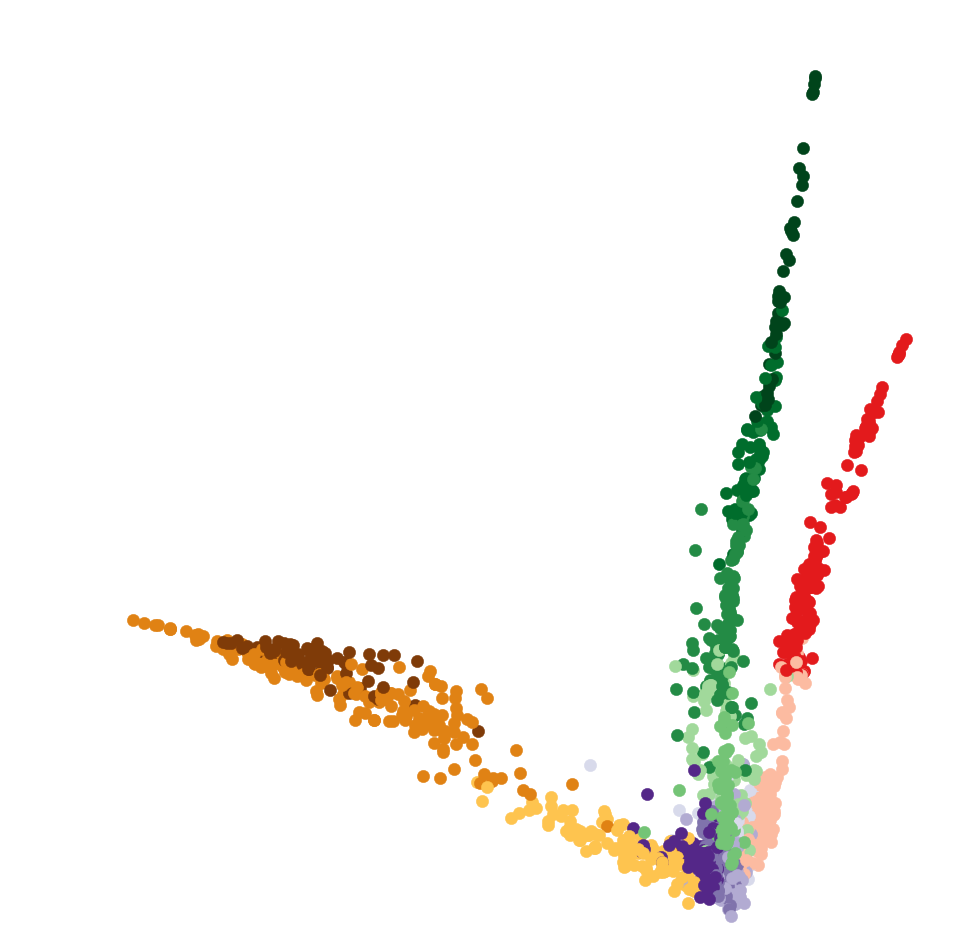

In [34]:
cells = cl_c_ANA
tsne = diffmap_ANA.loc[dpt_ANA.index]
cmap = cmap_2nd
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in index:

    ax1.scatter(tsne.loc[ix,'x'],
                tsne.loc[ix,'y'], 
                s = 150,
                linewidth = 0.5,
                c = cmap[cells[ix]],
                edgecolor=cmap[cells[ix]], 
                marker = markers[time[ix]], 
                alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_groups.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

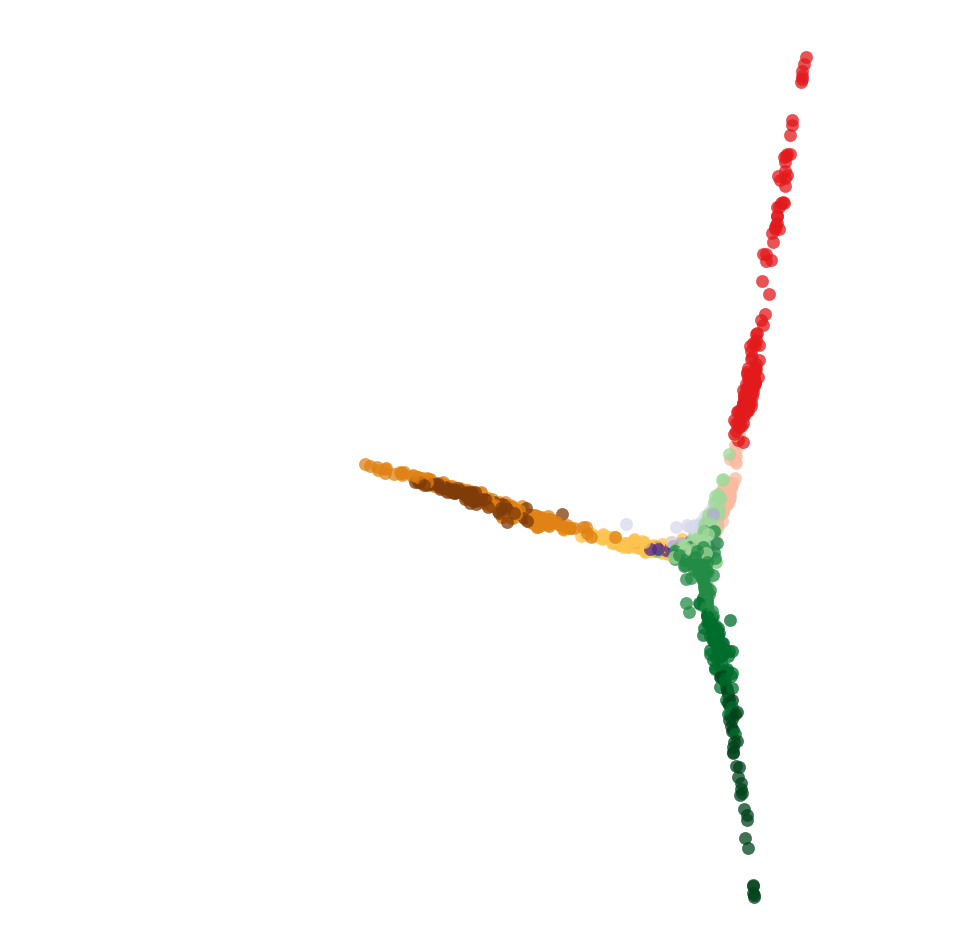

In [35]:
cells = cl_c_ANA
tsne = diffmap_ANA.loc[dpt_ANA.index]
cmap = cmap_2nd
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['z']) * 1.1, np.max(tsne['z']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['y'].sort_values().index

for ix in index:

    ax1.scatter(tsne.loc[ix,'x'],
                tsne.loc[ix,'z'], 
                s = 150,
                linewidth = 0.5,
                c = cmap[cells[ix]],
                edgecolor=cmap[cells[ix]], 
                marker = markers[time[ix]], 
                alpha = 0.75)

clean_axis(ax1)

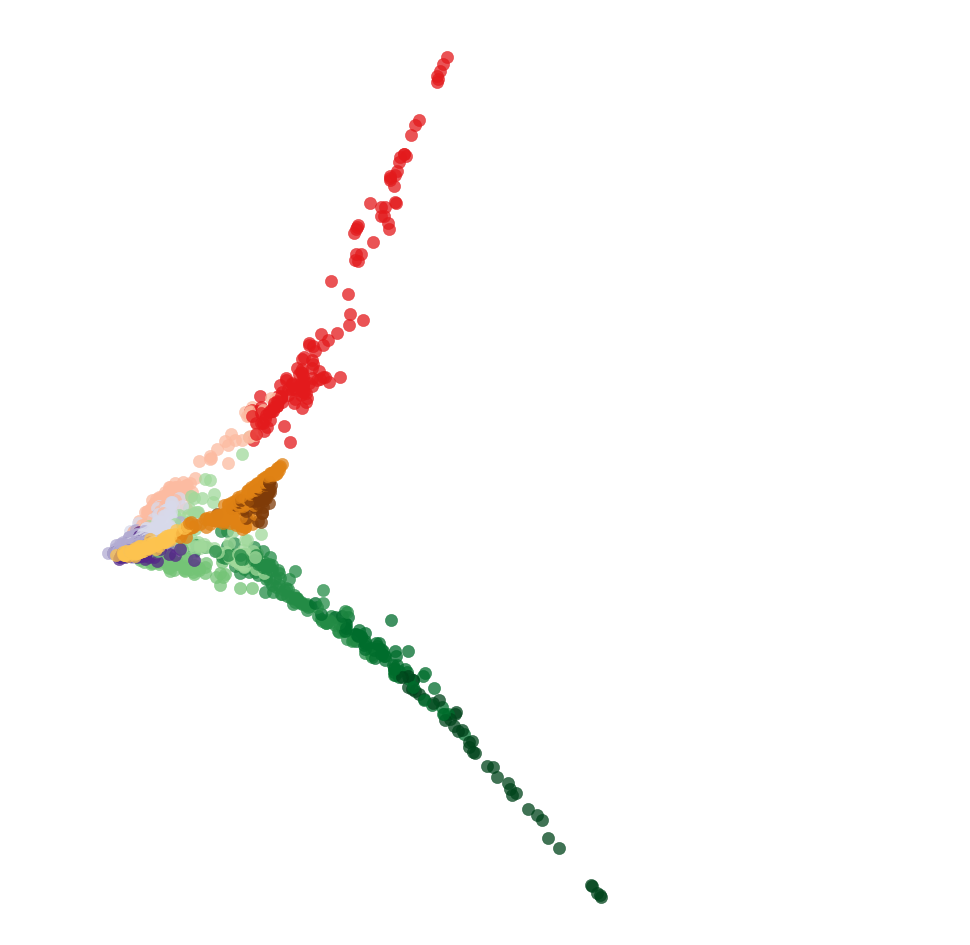

In [36]:
cells = cl_c_ANA
tsne = diffmap_ANA.loc[dpt_ANA.index]
cmap = cmap_2nd
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
y_min, y_max = np.min(tsne['z']) * 1.1, np.max(tsne['z']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['x'].sort_values()[::-1].index

for ix in index:

    ax1.scatter(tsne.loc[ix,'y'],
                tsne.loc[ix,'z'], 
                s = 150,
                linewidth = 0.5,
                c = cmap[cells[ix]],
                edgecolor=cmap[cells[ix]], 
                marker = markers[time[ix]], 
                alpha = 0.75)
    
clean_axis(ax1)

## Plot individual pseudotimes

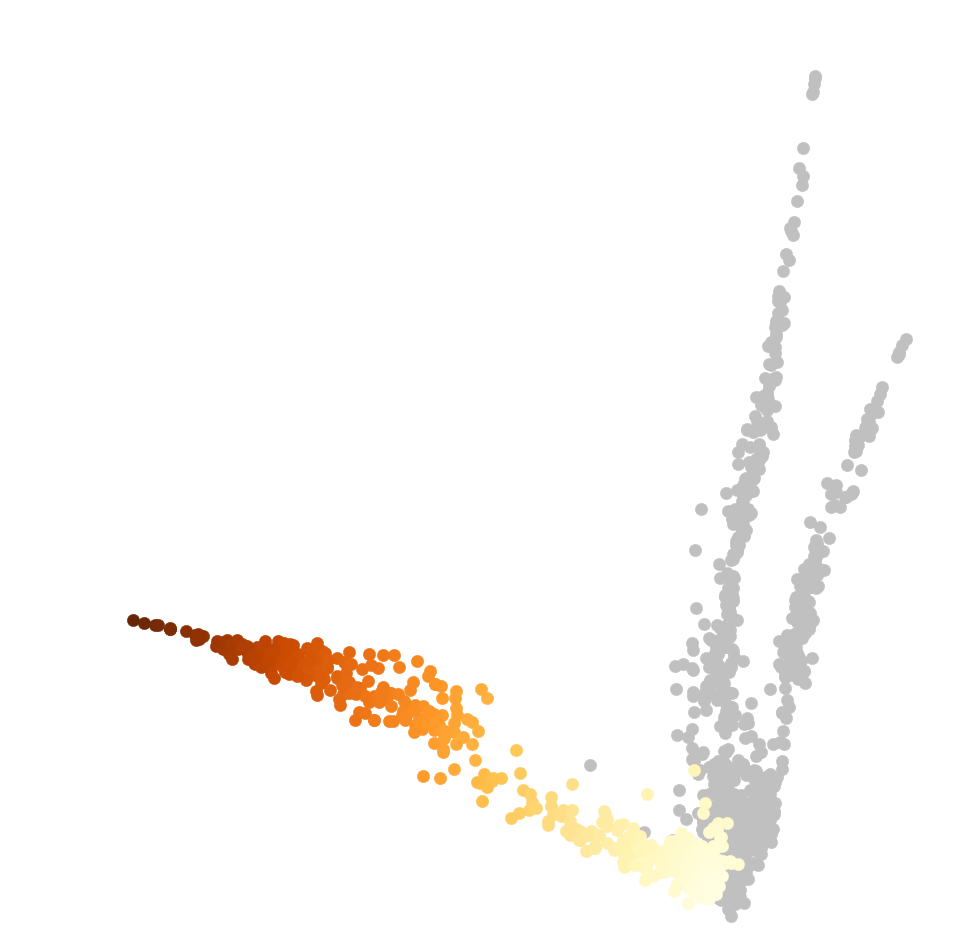

In [37]:
cells = cl_c_ANA
tsne = diffmap_ANA.loc[dpt_ANA.index]
coords = dpt_ANA_CL
coords /= coords.max()
cmap = plt.cm.YlOrBr
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in [i for i in index if i not in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 150,
                    linewidth = 0.5,
                    c = 'silver',
                    edgecolor='silver', 
                    marker = markers[time[ix]], 
                    alpha = 1)
        
for ix in [i for i in index if i in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 150,
                    linewidth = 0.5,
                    c = cmap(coords[ix]),
                    edgecolor=cmap(coords[ix]), 
                    marker = markers[time[ix]], 
                    alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_PTO_CL.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


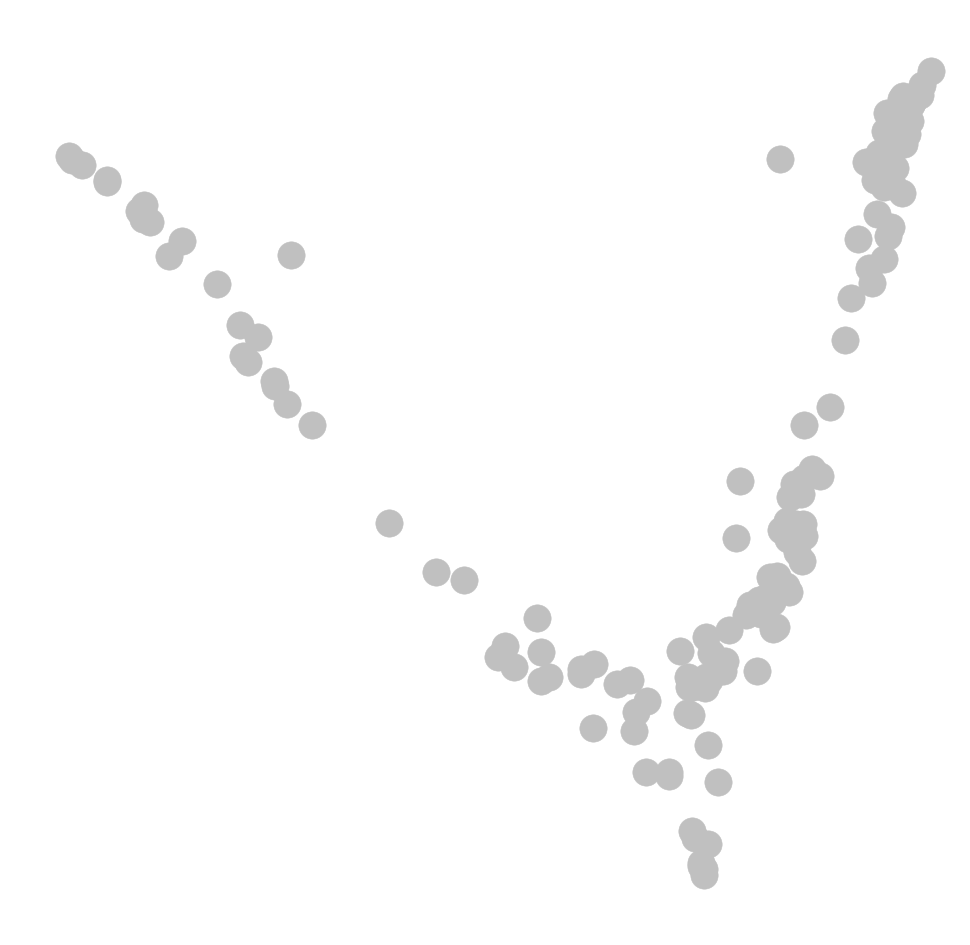

In [41]:
cells = cl_c_ANA
tsne = diffmap_IRS.loc[dpt_ANA.index]
coords = dpt_ANA_CL
coords /= coords.max()
cmap = plt.cm.YlOrBr
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in [i for i in index if i not in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 750,
                    linewidth = 0.5,
                    c = 'silver',
                    edgecolor='silver', 
                    marker = markers[time[ix]], 
                    alpha = 1)
        
for ix in [i for i in index if i in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 750,
                    linewidth = 0.5,
                    c = cmap(coords[ix]),
                    edgecolor=cmap(coords[ix]), 
                    marker = markers[time[ix]], 
                    alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_IRS_PTO_CL.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

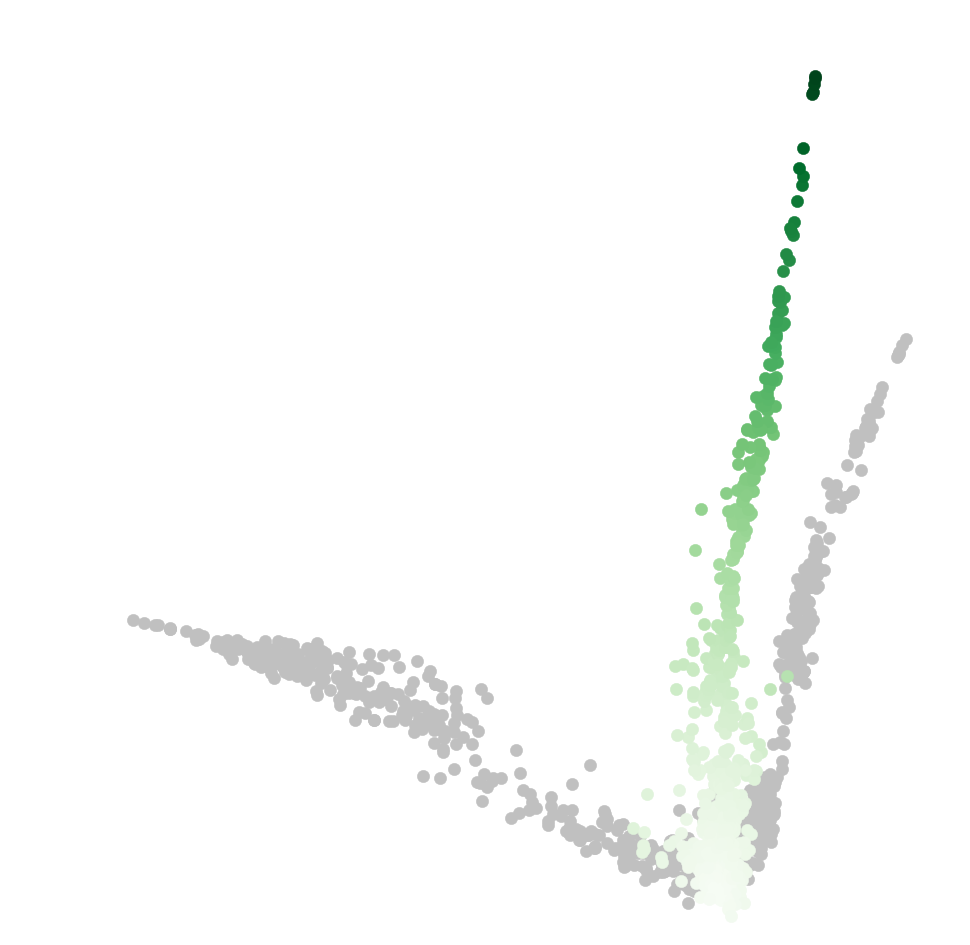

In [43]:
cells = cl_c_ANA
tsne = diffmap_ANA.loc[dpt_ANA.index]
coords = dpt_ANA_CX
coords /= coords.max()
cmap = plt.cm.Greens
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in [i for i in index if i not in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 150,
                    linewidth = 0.5,
                    c = 'silver',
                    edgecolor='silver', 
                    marker = markers[time[ix]], 
                    alpha = 1)
        
for ix in [i for i in index if i in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 150,
                    linewidth = 0.5,
                    c = cmap(coords[ix]),
                    edgecolor=cmap(coords[ix]), 
                    marker = markers[time[ix]], 
                    alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_PTO_CX.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


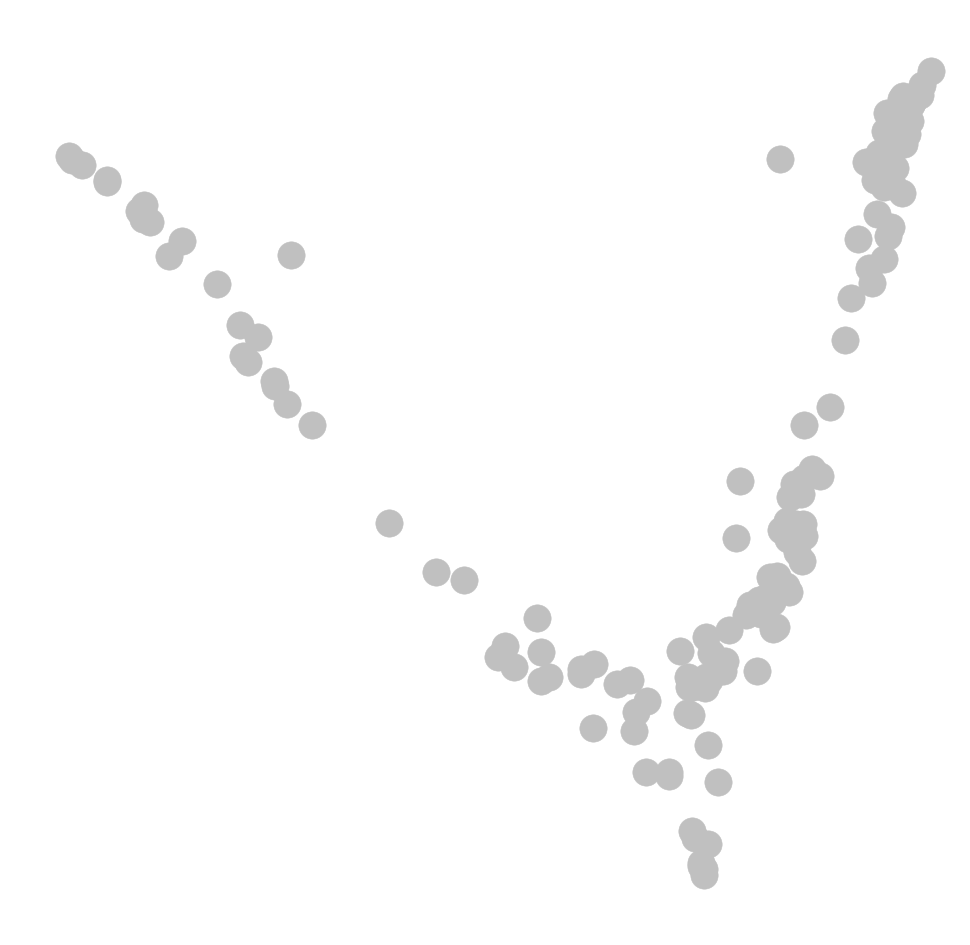

In [44]:
cells = cl_c_ANA
tsne = diffmap_IRS.loc[dpt_ANA.index]
coords = dpt_ANA_CX
coords /= coords.max()
cmap = plt.cm.Greens
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in [i for i in index if i not in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 750,
                    linewidth = 0.5,
                    c = 'silver',
                    edgecolor='silver', 
                    marker = markers[time[ix]], 
                    alpha = 1)
        
for ix in [i for i in index if i in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 750,
                    linewidth = 0.5,
                    c = cmap(coords[ix]),
                    edgecolor=cmap(coords[ix]), 
                    marker = markers[time[ix]], 
                    alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_IRS_PTO_CX.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

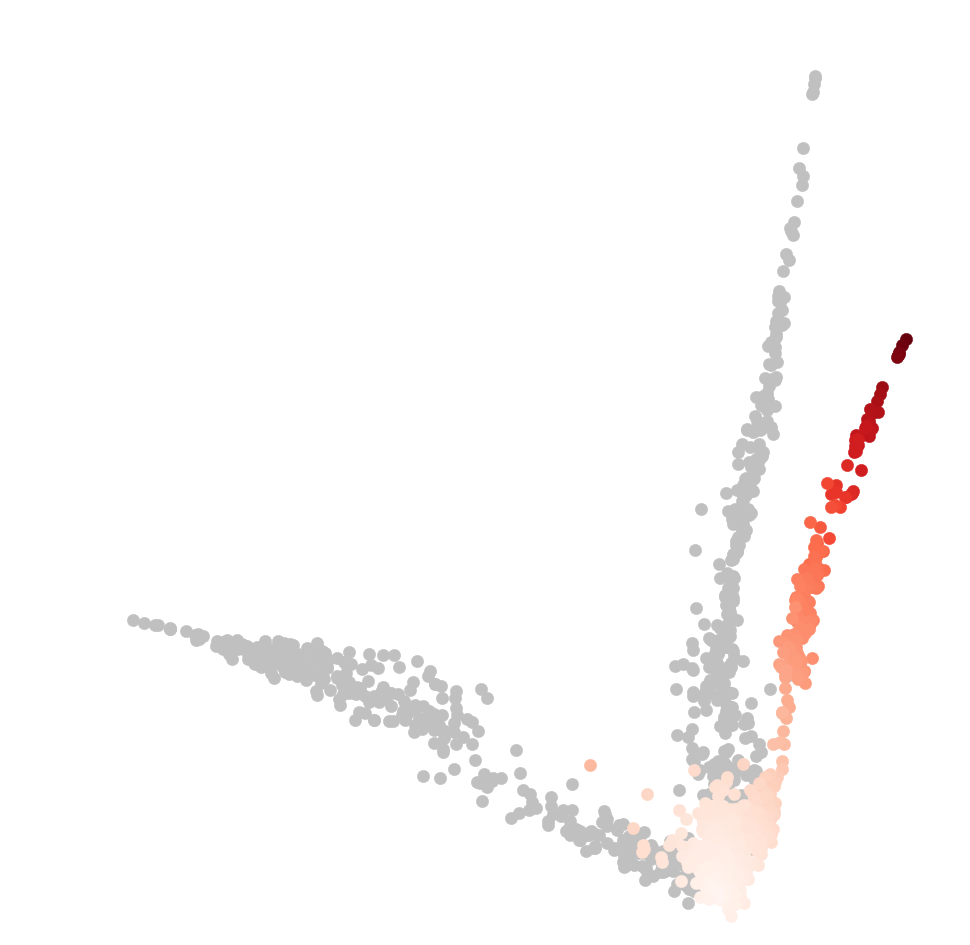

In [45]:
cells = cl_c_ANA
tsne = diffmap_ANA.loc[dpt_ANA.index]
coords = dpt_ANA_IRS
coords /= coords.max()
cmap = plt.cm.Reds
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in [i for i in index if i not in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 150,
                    linewidth = 0.5,
                    c = 'silver',
                    edgecolor='silver', 
                    marker = markers[time[ix]], 
                    alpha = 1)
        
for ix in [i for i in index if i in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 150,
                    linewidth = 0.5,
                    c = cmap(coords[ix]),
                    edgecolor=cmap(coords[ix]), 
                    marker = markers[time[ix]], 
                    alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_PTO_IRS.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


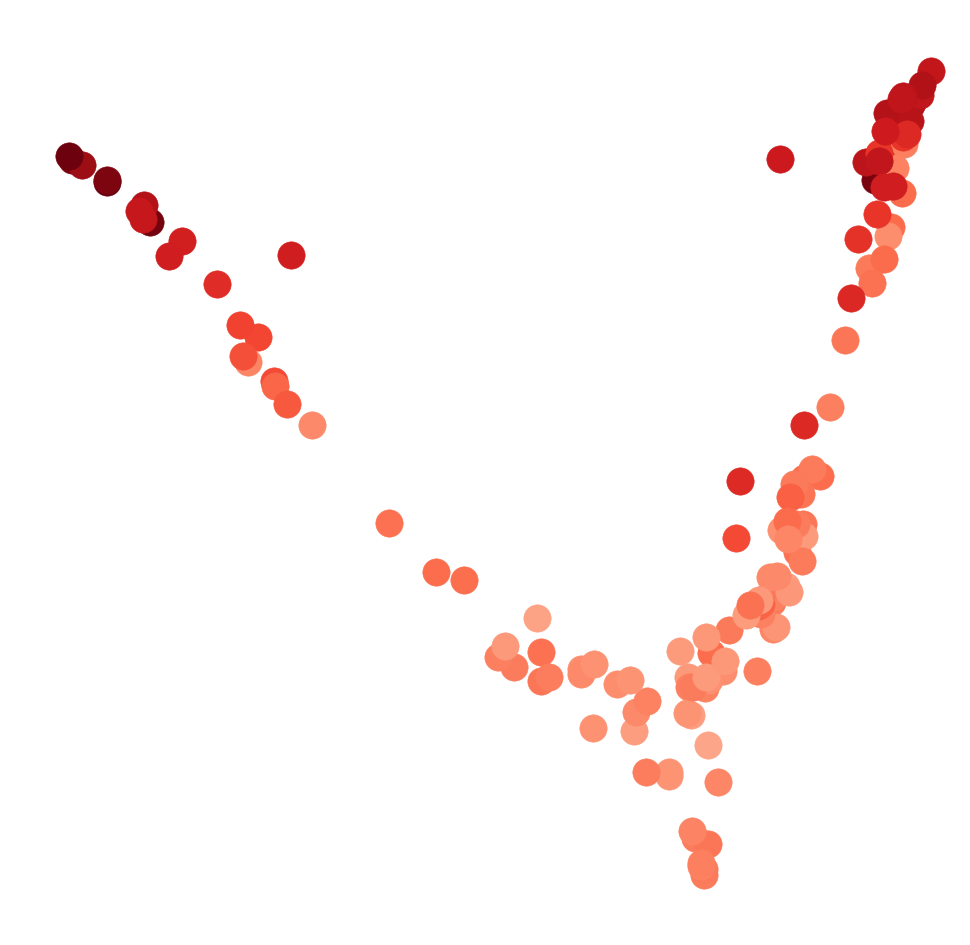

In [46]:
cells = cl_c_ANA
tsne = diffmap_IRS.loc[dpt_ANA.index]
coords = dpt_ANA_IRS
coords /= coords.max()
cmap = plt.cm.Reds
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in [i for i in index if i not in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 750,
                    linewidth = 0.5,
                    c = 'silver',
                    edgecolor='silver', 
                    marker = markers[time[ix]], 
                    alpha = 1)
        
for ix in [i for i in index if i in coords]:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 750,
                    linewidth = 0.5,
                    c = cmap(coords[ix]),
                    edgecolor=cmap(coords[ix]), 
                    marker = markers[time[ix]], 
                    alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_IRS_PTO_IRS.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Markov model diffused from vcy on tSNE

In [47]:
diffused_fwd = loadData_v1(path_output, exp_id, 'diffused_fwd', 'Series')
diffused_bwd = loadData_v1(path_output, exp_id, 'diffused_bwd', 'Series')

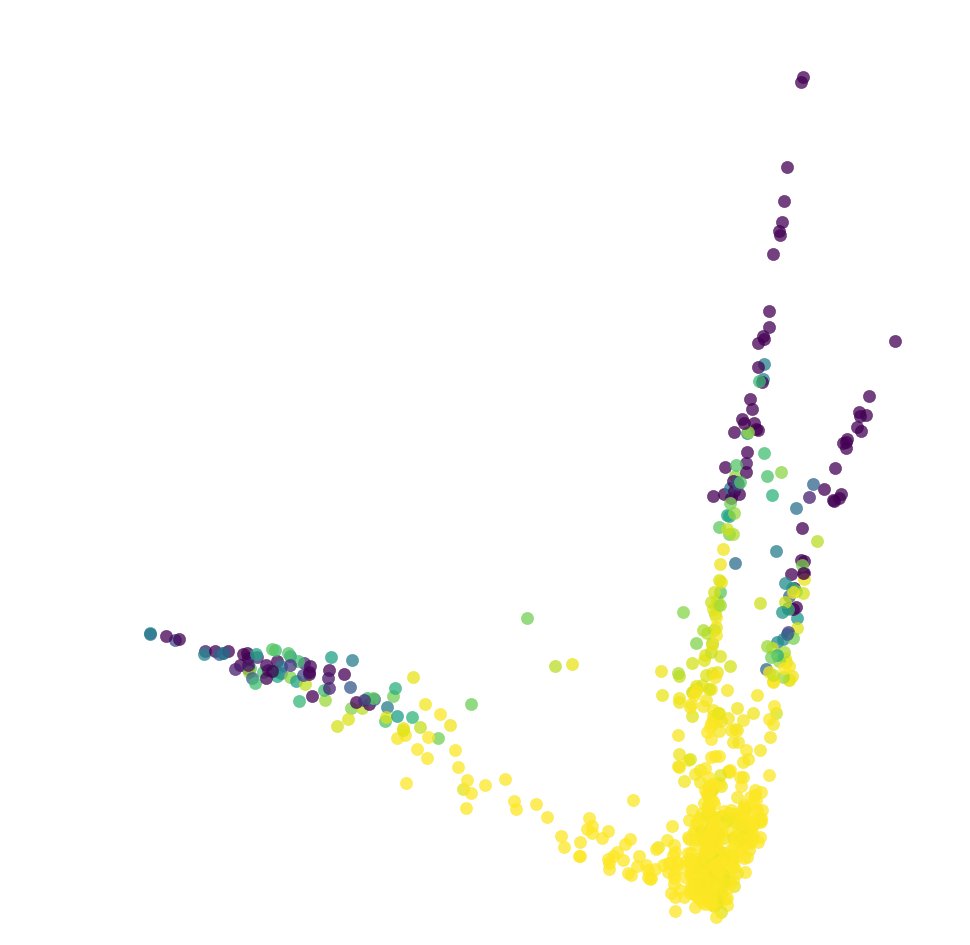

In [48]:
data = diffused_fwd
data -= np.percentile(data, 10)
data /= np.percentile(data, 90)
data = np.clip(data, 0, 1)

tsne = diffmap_ANA.loc[data.index]
cmap = plt.cm.viridis_r
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in index:
    
    ax1.scatter(tsne.loc[ix,'x'],
                tsne.loc[ix,'y'], 
                s = 150,
                linewidth = 0.5,
                c = cmap(data[ix]),
                edgecolor=cmap(data[ix]), 
                marker = markers[time[ix]], 
                alpha = 0.75)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_markov_fwd.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

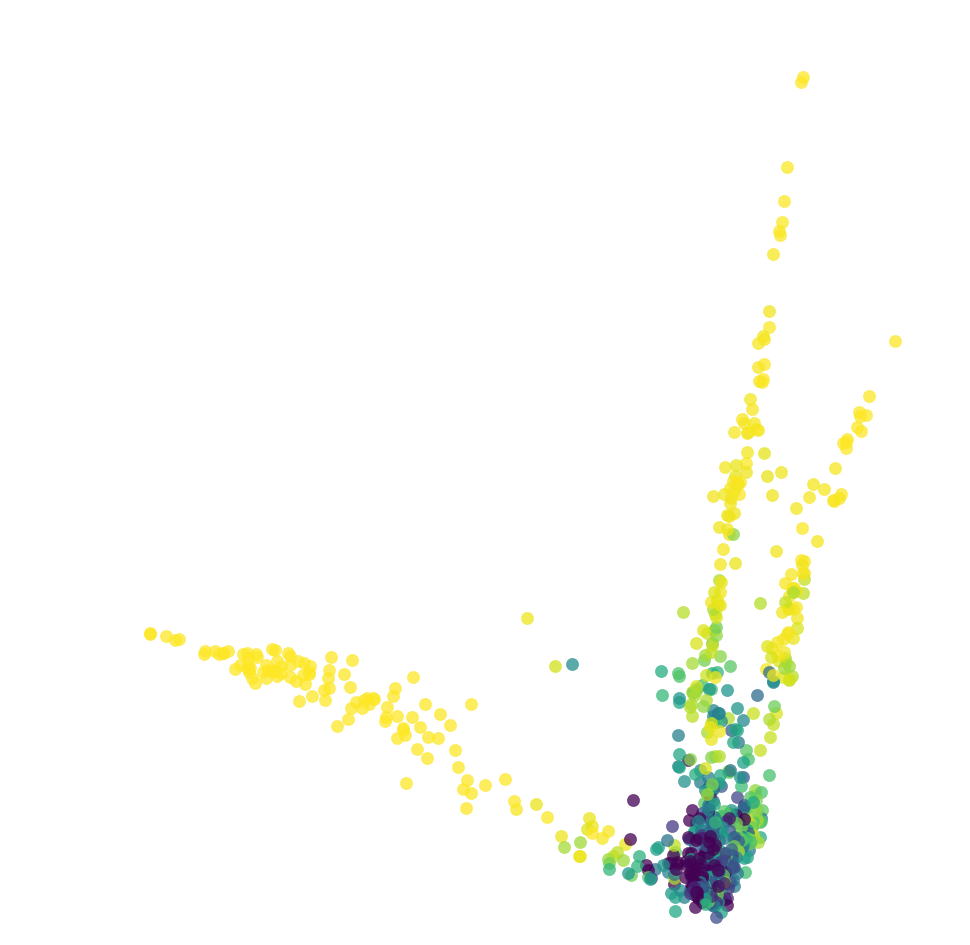

In [49]:
data = diffused_bwd
data -= np.percentile(data, 10)
data /= np.percentile(data, 90)
data = np.clip(data, 0, 1)

tsne = diffmap_ANA.loc[data.index]
cmap = plt.cm.viridis_r
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in index:
    
    ax1.scatter(tsne.loc[ix,'x'],
                tsne.loc[ix,'y'], 
                s = 150,
                linewidth = 0.5,
                c = cmap(data[ix]),
                edgecolor=cmap(data[ix]), 
                marker = markers[time[ix]], 
                alpha = 0.75)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_markov_bwd.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Analyze pseudotime - medulla (NB: still has old name = CL)

In [34]:
def PTO_bin_axis(data, n_bins, bin_range, bin_names):
    
    """
    Divides a pseudotemporal axis into bins.
    -----------
    data: [pd.Series] containing the axis coordinates of m cells.
    n_bins: number [int] of bins.
    bin_range: [tuple] of beginning and end of bin range.
    bin_names: [list] of names for each bin.
    -----------
    returns
    """
    
    #get bin edges
    
    bins = np.histogram(data, n_bins, bin_range)[1]
    
    #digitize
    
    dig = np.digitize(data, bins)
    
    #transform to pd.Series with bin names
    
    output = pd.Series(index = data.index)
    
    for pos,ix in enumerate(data.index):
        output.loc[ix] = bin_names[dig[pos]-1]
        
    return bins, output

In [35]:
ANA_fitted = loadData_from_pickle_v1(path_output, exp_id, 'ANA_fitted')
ANA_stats = loadData_from_pickle_v1(path_output, exp_id, 'ANA_stats')

In [36]:
ANA_fitted_CL = ANA_fitted.loc['CL'][ANA_fitted.columns[0:100]]
ANA_stats_CL = ANA_stats.loc['CL']

In [37]:
cl_g_PT_CL = loadData_v1(path_output, exp_id, 'cl_g_PT_CL', 'Series')

## Heatmap - all significant genes

In [40]:
ANA_fitted_CL_norm = np.log2(ANA_fitted_CL.astype(float) + 1).apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=1)

In [41]:
cl_g_PT_CL = AP_groups_reorder_v2(cl_g_PT_CL, [4,2,7,6,3,0,1,5])

In [42]:
CL_bins = PTO_bin_axis(dpt_ANA_CL, 10, (0.0,1.01), range(10))[1]

In [43]:
cc_score_CL = pd.DataFrame(index = return_unique(CL_bins), columns = ['G1','S/G2M'])

for b in return_unique(CL_bins):
    c_tmp = CL_bins[CL_bins==b].index
    cc_score_CL.loc[b,'G1'] = np.sum(cc_score_v2.loc[c_tmp]=='G1')
    cc_score_CL.loc[b,'S/G2M'] = np.sum(cc_score_v2.loc[c_tmp]=='S') +  np.sum(cc_score_v2.loc[c_tmp]=='G2M')

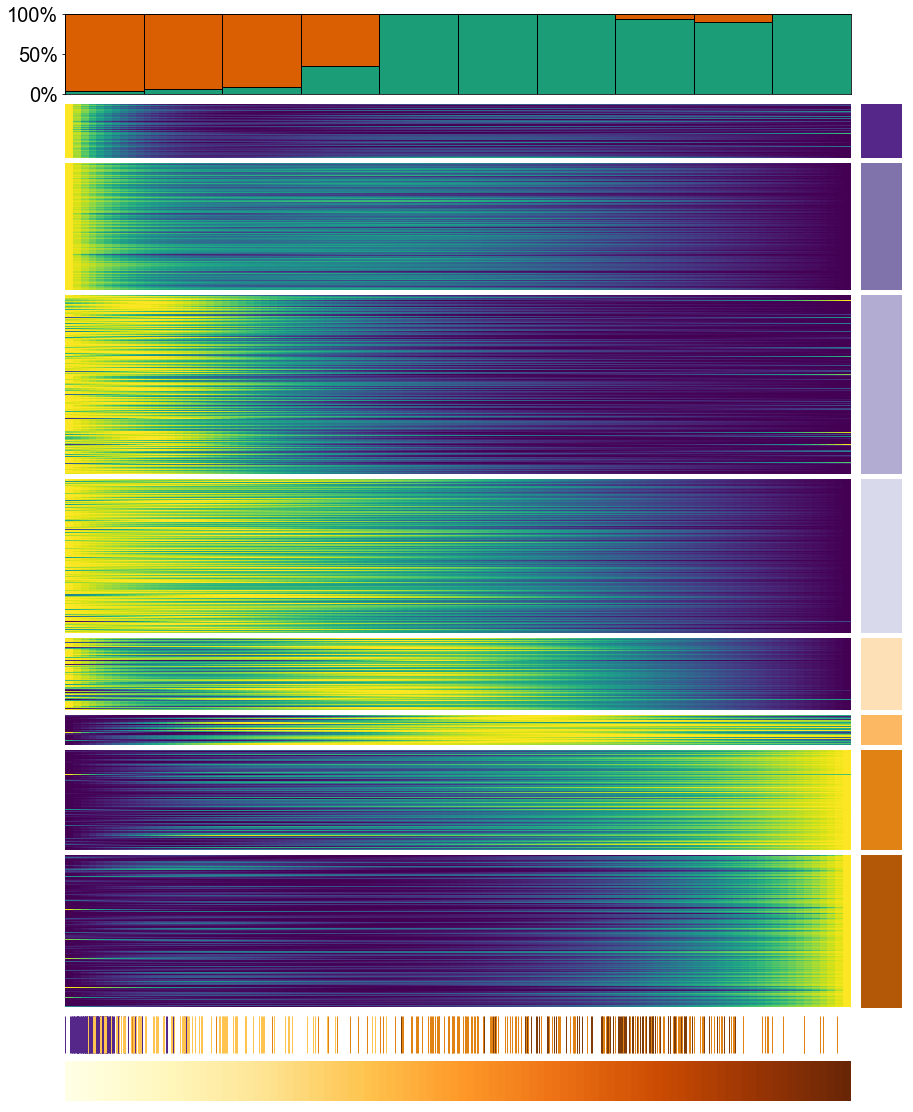

In [43]:
dataset = ANA_fitted_CL_norm
cell_groups = cl_c_ANA
gene_groups = cl_g_PT_CL
PTO_coords = dpt_ANA_CL
bins = CL_bins
cc = cc_score_CL.apply(lambda x: x / np.sum(x), axis = 1)
cmap = cmap_2nd
cmap_g = {4:'#542788',2:'#8073ac',7:'#b2abd2',6:'#d8daeb',3:'#fee0b6',0:'#fdb863',1:'#e08214',5:'#b35806'}
nmap_g = None

#initialize figure

height = 20
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(4, 2, hspace=0.025, wspace=0.025, height_ratios=[1.5,17,0.75,0.75], width_ratios = [14.25,0.75])

#draw heatmap in pseudotime

dataset = dataset.loc[gene_groups.index]
ax0 = plt.subplot(gs1[1,0])
ax0.set_ylim(len(dataset.index), 0)
ax0.matshow(dataset, aspect = 'auto', cmap = plt.cm.viridis, vmin = 0, vmax = 1.0)
clean_axis(ax0)

#PTO coords

ax1 = plt.subplot(gs1[2,0])
ax1.set_xlim(0, np.max(PTO_coords))
for ix in PTO_coords.index:
    ax1.vlines(x = PTO_coords[ix], ymin = 0, ymax = 1, 
               color = cmap[cell_groups[ix]], linewidth = 1.0)
clean_axis(ax1)

#PTO colormap

ax2 = plt.subplot(gs1[3,0])
ax2.set_xlim(0,1)
for pos in np.arange(0,1,0.01):
    ax2.axvspan(pos, pos + 0.01, color = plt.cm.YlOrBr(pos))    
clean_axis(ax2)

#gene group identity

ax3 = plt.subplot(gs1[1,1])
ax3.set_ylim(len(dataset.index),0)
for pos, gr in enumerate(gene_groups.values):
    ax3.axhspan(pos, pos + 1, color = cmap_g[gr])  
clean_axis(ax3)

#draw lines

for gr in set(gene_groups): 
    pos = list(gene_groups).index(gr)   
    ax0.axhline(pos, color = 'white', linewidth = 5)
    ax3.axhline(pos, color = 'white', linewidth = 5)
    
#cell cycle stage

ax4 = plt.subplot(gs1[0,0])

ax4.set_xlim(-0.5, len(set(bins))-0.5)
ax4.set_xticks([])
ax4.set_ylim(0,1)
ax4.set_yticks([0.0,0.5,1.0])
ax4.set_yticklabels(['0%','50%','100%'], family = 'Arial', fontsize = 20)


for pos, b in enumerate(return_unique(bins)):
    ax4.bar(x = pos, height = cc.loc[b,'G1'], 
            color = '#1b9e77', width = 1, linewidth = 1, edgecolor = 'black')
    ax4.bar(x = pos, bottom = cc.loc[b,'G1'], height = cc.loc[b,'S/G2M'], 
            color = '#d95f02', width = 1, linewidth = 1, edgecolor = 'black')
    
figname = 'v1.5_Fig5_diff_hm_CL.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Example genes

In [38]:
genes_sel_CL = ['Dcn',
                'Ccnd2',
                'Hmgb2',
                'Mt1',
                'Gja1','Mt4','Them4',
                'Aldh1a3','Rgcc','Tmsb10',
                'Urah','Kitl','S100a6',
                'Gpnmb','Tspan3','Sct']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:82: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bott

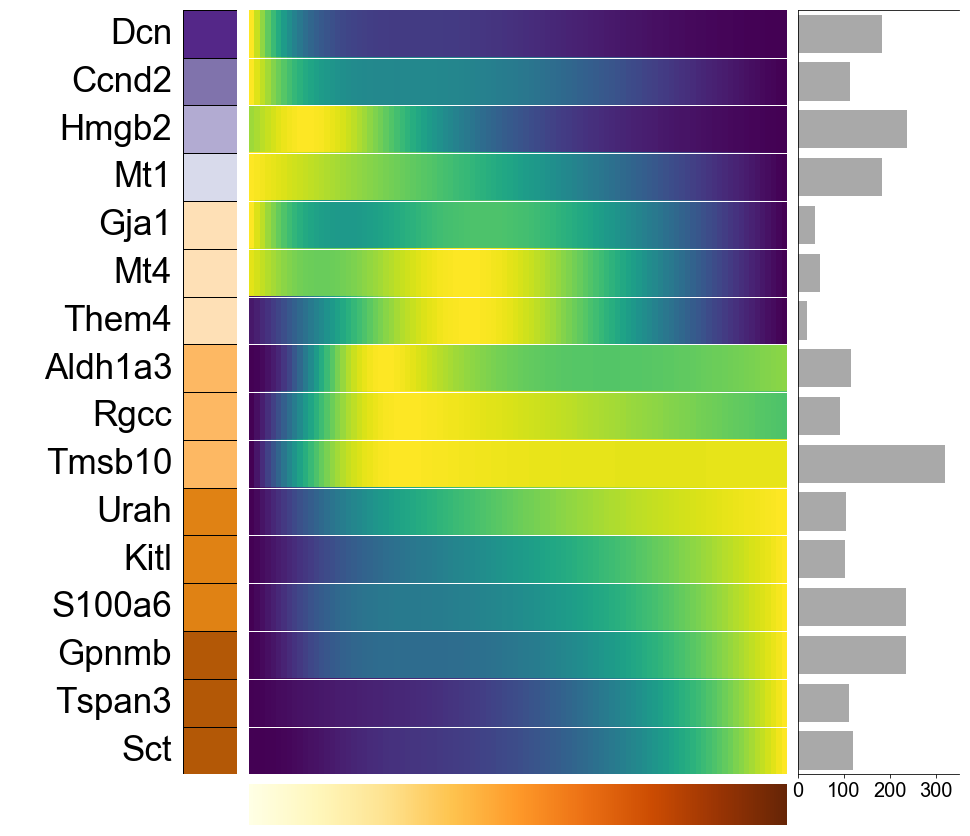

In [44]:
gene_sel = genes_sel_CL
splines = ANA_fitted_CL_norm
p_val = -np.log10(ANA_stats_CL['Pr(>Chisq)-BH_null'].astype(float))
cutoff = -np.log10(0.001)
gene_groups = cl_g_PT_CL
cmap_gene_groups = {4:'#542788',2:'#8073ac',7:'#b2abd2',6:'#d8daeb',3:'#fee0b6',0:'#fdb863',1:'#e08214',5:'#b35806'}
cmap_splines = plt.cm.viridis
cmap_colorbar = plt.cm.YlOrBr

#initialize figure

height = 15
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[14,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel) - 0.5, -0.5)

for pos, g in enumerate(gene_sel):
    ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel), 0.0)

lw = 1

for pos, g in enumerate(gene_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[gene_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(gene_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[gene_sel].max() * 1.1)
ax.set_ylim(len(gene_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(gene_sel))], 
        width = p_val.ix[gene_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_marker_CL.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Plot individual marker genes

In [250]:
dpt_ANA_CL = loadData_v1(path_output, exp_id, 'dpt_ANA_CL', 'Series')

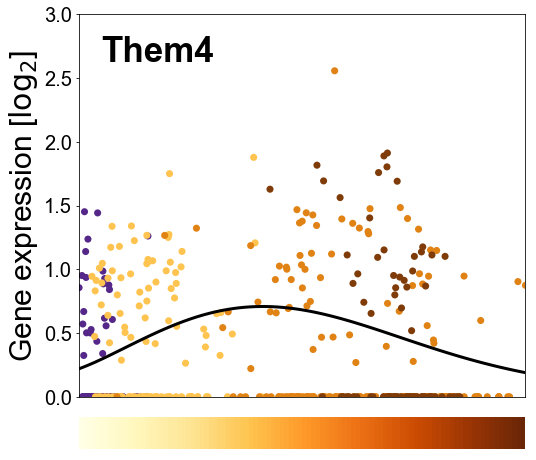

In [251]:
g = 'Them4'

dpt = dpt_ANA_CL
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CL.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.YlOrBr
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CL_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

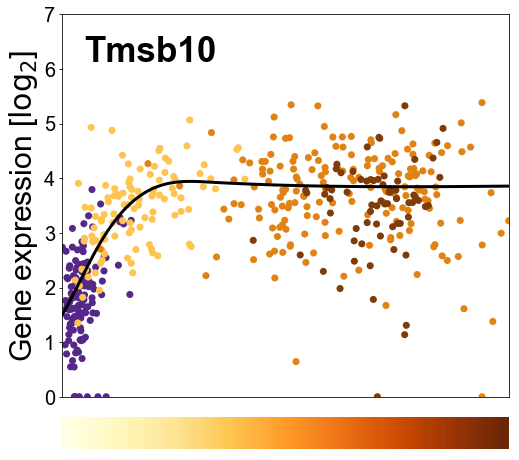

In [252]:
g = 'Tmsb10'

dpt = dpt_ANA_CL
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CL.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.YlOrBr
ylim = (0, 7)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CL_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

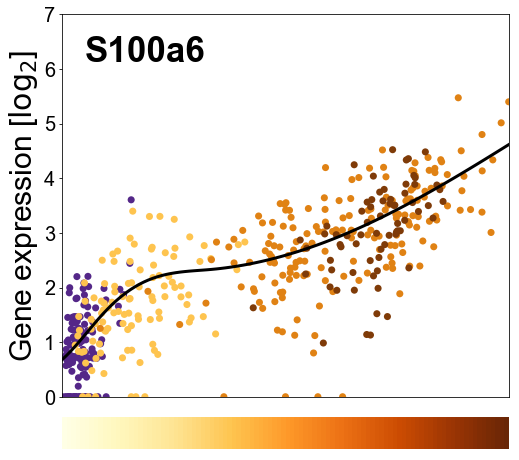

In [253]:
g = 'S100a6'

dpt = dpt_ANA_CL
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CL.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.YlOrBr
ylim = (0, 7)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CL_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

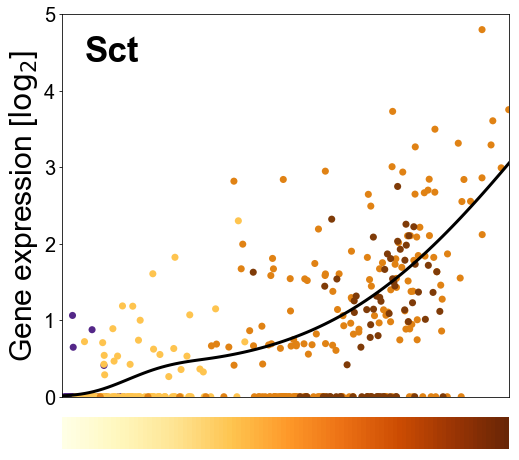

In [254]:
g = 'Sct'

dpt = dpt_ANA_CL
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CL.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.YlOrBr
ylim = (0, 5)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CL_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

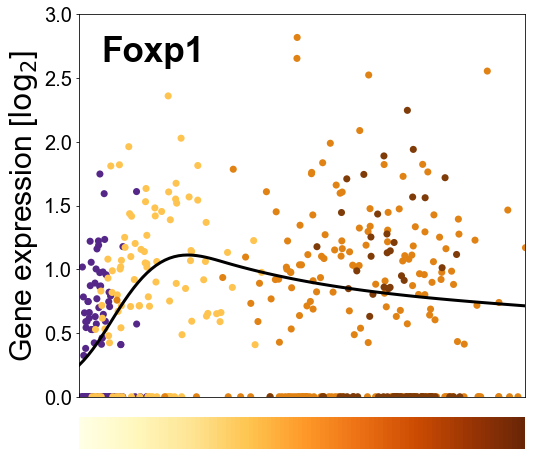

In [255]:
g = 'Foxp1'

dpt = dpt_ANA_CL
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CL.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.YlOrBr
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CL_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

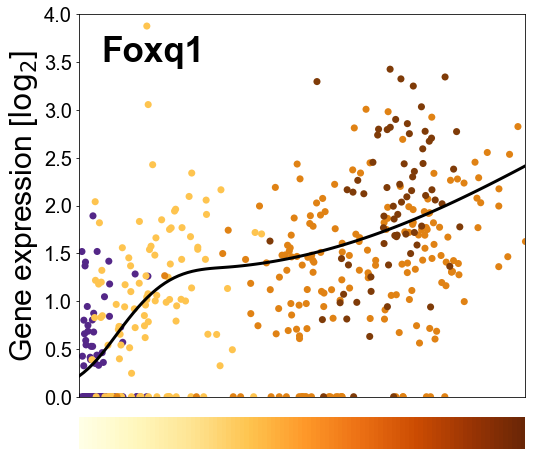

In [256]:
g = 'Foxq1'

dpt = dpt_ANA_CL
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CL.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.YlOrBr
ylim = (0, 4)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CL_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Transcription factors

In [45]:
TF_CL = ['Nfib','Hoxb6',
         'Lef1','Foxp1',
         'Lrrfip1','Foxq1',
         'Hoxc13','Grhl1',]

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:90: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


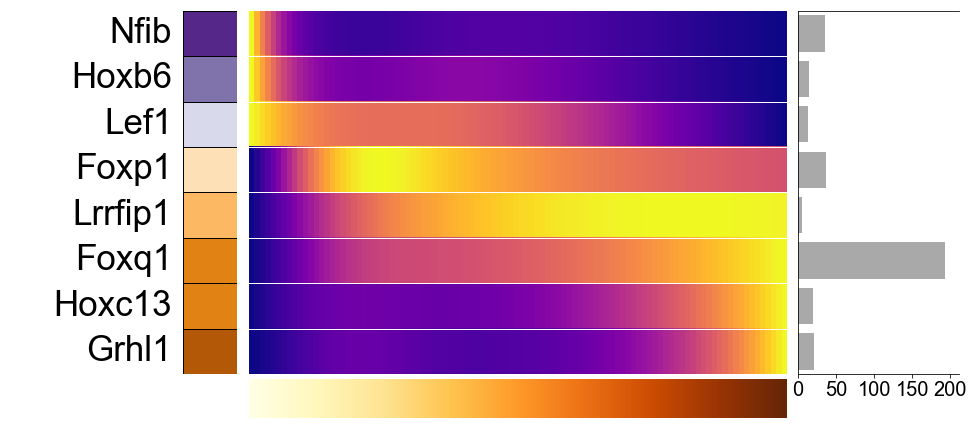

In [46]:
#data

TF_sel = TF_CL
TF_sel_un = []
splines = ANA_fitted_CL_norm
p_val = -np.log10(ANA_stats_CL['Pr(>Chisq)-BH_null'].astype(float))
cutoff = -np.log10(0.001)
gene_groups = cl_g_PT_CL
cmap_gene_groups = {4:'#542788',2:'#8073ac',7:'#b2abd2',6:'#d8daeb',3:'#fee0b6',0:'#fdb863',1:'#e08214',5:'#b35806'}
cmap_splines = plt.cm.plasma
cmap_colorbar = plt.cm.YlOrBr

#initialize figure

#initialize figure

height = 7.5
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[7,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(TF_sel) - 0.5, -0.5)

for pos, g in enumerate(TF_sel):
    if g in TF_sel_un:
        ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center', fontweight = 'bold')
    else:
        ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(TF_sel), 0.0)

lw = 1

for pos, g in enumerate(TF_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[TF_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(TF_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[TF_sel].max() * 1.1)
ax.set_ylim(len(TF_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(TF_sel))], 
        width = p_val.ix[TF_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_TF_CL.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Analyze pseudotime - cortex

In [47]:
ANA_fitted_CX = ANA_fitted.loc['CX'][ANA_fitted.columns[0:]]
ANA_stats_CX = ANA_stats.loc['CX']

In [48]:
cl_g_PT_CX = loadData_v1(path_output, exp_id, 'cl_g_PT_CX', 'Series')

## Heatmap - all significant genes

In [49]:
g_sel = cl_g_PT_CX[cl_g_PT_CX.isin([2])].index

In [50]:
CX_fitted_norm = np.log2(ANA_fitted_CX.astype(float) + 1).apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=1)

In [51]:
cl_g_PT_CX = AP_groups_reorder_v2(cl_g_PT_CX, [5,4,0,1,6,2,7,3])

In [52]:
CX_bins = PTO_bin_axis(dpt_ANA_CX, 10, (0.0,1.01), range(10))[1]

In [53]:
cc_score_CX = pd.DataFrame(index = return_unique(CX_bins), columns = ['G1','S/G2M'])

for b in return_unique(CX_bins):
    c_tmp = CX_bins[CX_bins==b].index
    cc_score_CX.loc[b,'G1'] = np.sum(cc_score_v2.loc[c_tmp]=='G1')
    cc_score_CX.loc[b,'S/G2M'] = np.sum(cc_score_v2.loc[c_tmp]=='S') +  np.sum(cc_score_v2.loc[c_tmp]=='G2M')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


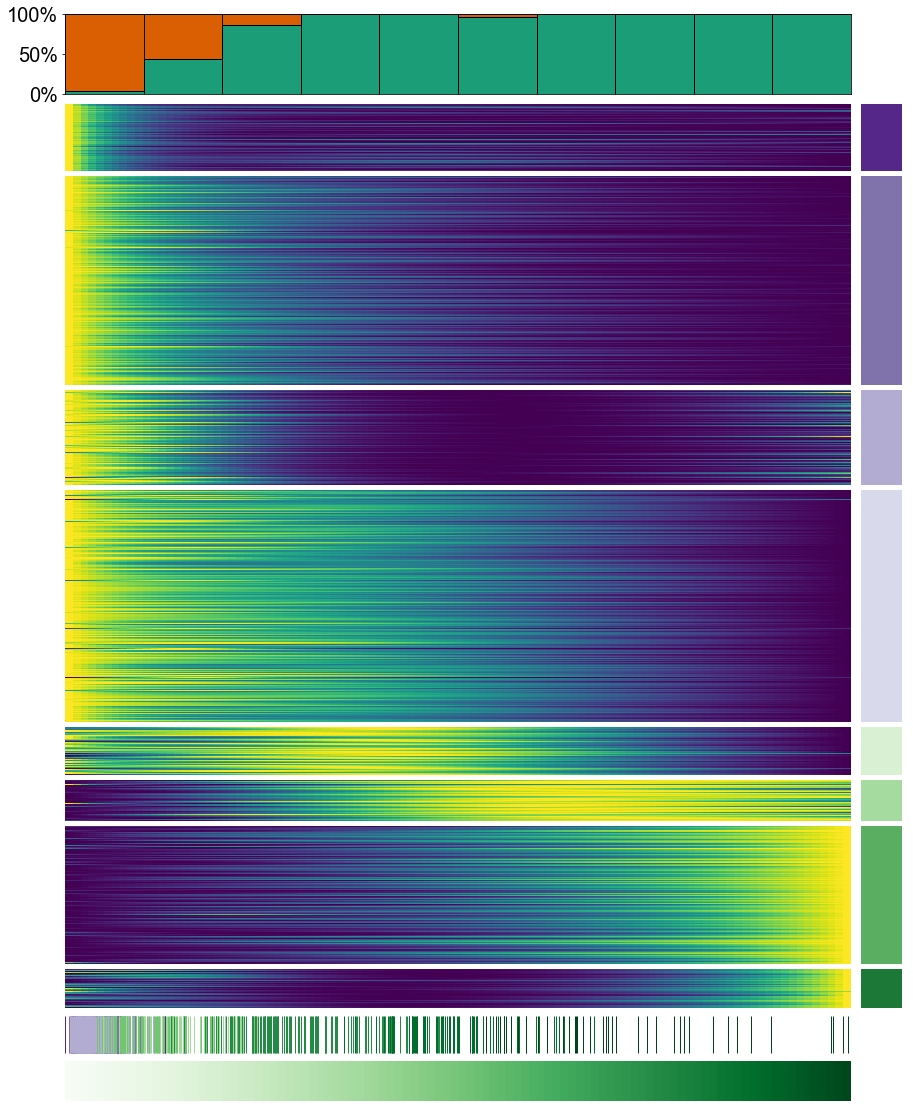

In [50]:
dataset = CX_fitted_norm
cell_groups = cl_c_ANA
gene_groups = cl_g_PT_CX
bins = CX_bins
cc = cc_score_CX.apply(lambda x: x / np.sum(x), axis = 1)
PTO_coords = dpt_ANA_CX
cmap = cmap_2nd
cmap_g = {5:'#542788',4:'#8073ac',0:'#b2abd2',1:'#d8daeb',6:'#d9f0d3',2:'#a6dba0',7:'#5aae61',3:'#1b7837'}
nmap_g = None

#initialize figure

height = 20
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(4, 2, hspace=0.025, wspace=0.025, height_ratios=[1.5,17,0.75,0.75], width_ratios = [14.25,0.75])

#draw heatmap in pseudotime

dataset = dataset.loc[gene_groups.index]
ax0 = plt.subplot(gs1[1,0])
ax0.set_ylim(len(dataset.index), 0)
ax0.matshow(dataset, aspect = 'auto', cmap = plt.cm.viridis, vmin = 0, vmax = 1.0)
clean_axis(ax0)

#PTO coords

ax1 = plt.subplot(gs1[2,0])
ax1.set_xlim(0, np.max(PTO_coords))
for ix in PTO_coords.index:
    ax1.vlines(x = PTO_coords[ix], ymin = 0, ymax = 1, 
               color = cmap[cell_groups[ix]], linewidth = 1.0)
clean_axis(ax1)

#PTO colormap

ax2 = plt.subplot(gs1[3,0])
ax2.set_xlim(0,1)
for pos in np.arange(0,1,0.01):
    ax2.axvspan(pos, pos + 0.01, color = plt.cm.Greens(pos))    
clean_axis(ax2)

#gene group identity

ax3 = plt.subplot(gs1[1,1])
ax3.set_ylim(len(dataset.index),0)
for pos, gr in enumerate(gene_groups.values):
    ax3.axhspan(pos, pos + 1, color = cmap_g[gr])  
clean_axis(ax3)

#draw lines

for gr in set(gene_groups): 
    pos = list(gene_groups).index(gr)   
    ax0.axhline(pos, color = 'white', linewidth = 5)
    ax3.axhline(pos, color = 'white', linewidth = 5)
    
#cell cycle stage

ax4 = plt.subplot(gs1[0,0])

ax4.set_xlim(-0.5, len(set(bins))-0.5)
ax4.set_xticks([])
ax4.set_ylim(0,1)
ax4.set_yticks([0.0,0.5,1.0])
ax4.set_yticklabels(['0%','50%','100%'], family = 'Arial', fontsize = 20)


for pos, b in enumerate(return_unique(bins)):
    ax4.bar(x = pos, height = cc.loc[b,'G1'], 
            color = '#1b9e77', width = 1, linewidth = 1, edgecolor = 'black')
    ax4.bar(x = pos, bottom = cc.loc[b,'G1'], height = cc.loc[b,'S/G2M'], 
            color = '#d95f02', width = 1, linewidth = 1, edgecolor = 'black')
    
figname = 'v1.5_Fig5_diff_hm_CX.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Example genes

In [54]:
genes_sel_CX = ['Tubb5',
                'Mt2',
                'Hmgb2',
                'Tmsb10',
                'Sat1','Rexo2','Rgcc',
                'Selenbp1','Krt35','Dapl1',
                'Sfn','S100a6','Padi4',
                'Hspb1','Txn1','Tgm3']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:82: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bott

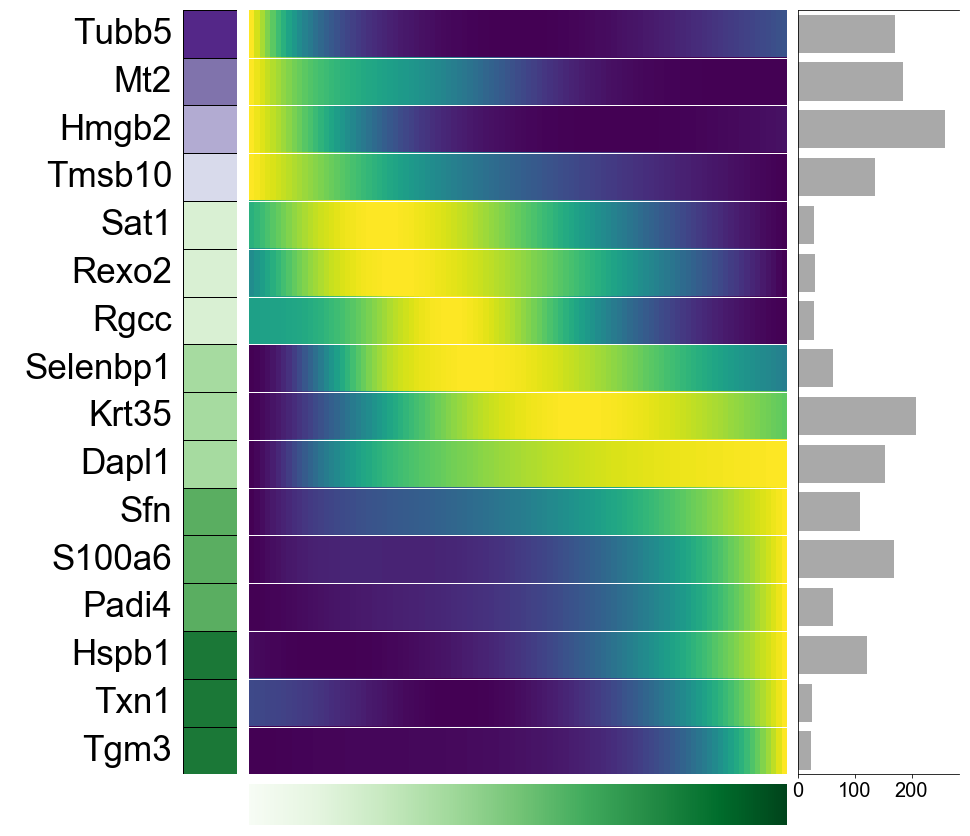

In [55]:
gene_sel = genes_sel_CX
splines = CX_fitted_norm
p_val = -np.log10(ANA_stats_CX['Pr(>Chisq)-BH_null'].astype(float))
cutoff = -np.log10(0.001)
gene_groups = cl_g_PT_CX
cmap_gene_groups = {5:'#542788',4:'#8073ac',0:'#b2abd2',1:'#d8daeb',6:'#d9f0d3',2:'#a6dba0',7:'#5aae61',3:'#1b7837'}
cmap_splines = plt.cm.viridis
cmap_colorbar = plt.cm.Greens

#initialize figure

height = 15
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[14,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel) - 0.5, -0.5)

for pos, g in enumerate(gene_sel):
    ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel), 0.0)

lw = 1

for pos, g in enumerate(gene_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[gene_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(gene_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[gene_sel].max() * 1.1)
ax.set_ylim(len(gene_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(gene_sel))], 
        width = p_val.ix[gene_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_marker_CX.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Plot individual example genes

In [257]:
dpt_ANA_CX = loadData_v1(path_output, exp_id, 'dpt_ANA_CX', 'Series')

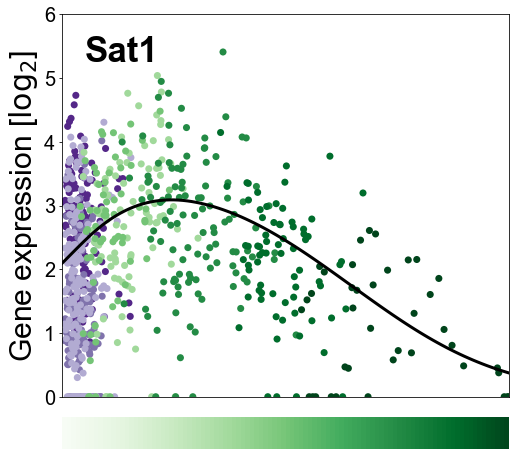

In [258]:
g = 'Sat1'

dpt = dpt_ANA_CX
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CX.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Greens
ylim = (0, 6)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CX_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

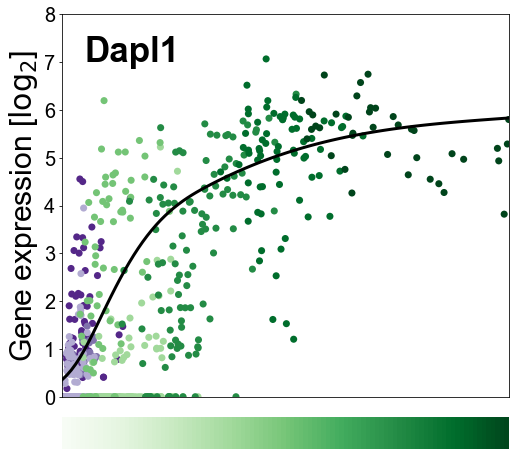

In [259]:
g = 'Dapl1'

dpt = dpt_ANA_CX
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CX.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Greens
ylim = (0, 8)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)


#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CX_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

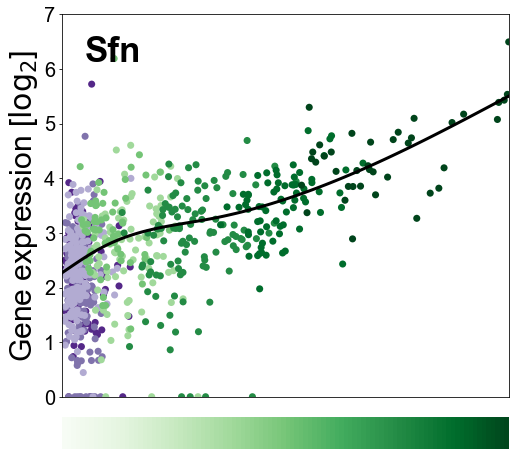

In [260]:
g = 'Sfn'

dpt = dpt_ANA_CX
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CX.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Greens
ylim = (0, 7)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CX_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

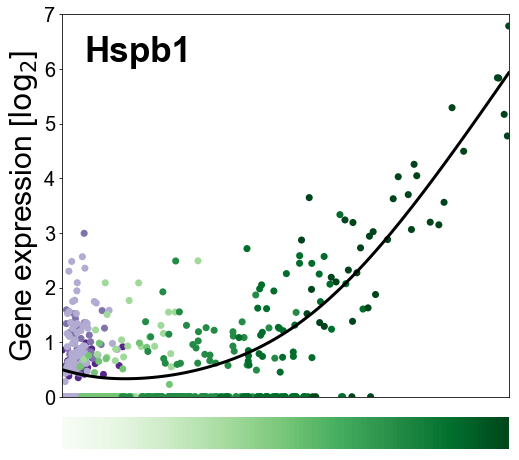

In [261]:
g = 'Hspb1'

dpt = dpt_ANA_CX
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CX.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Greens
ylim = (0, 7)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CX_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

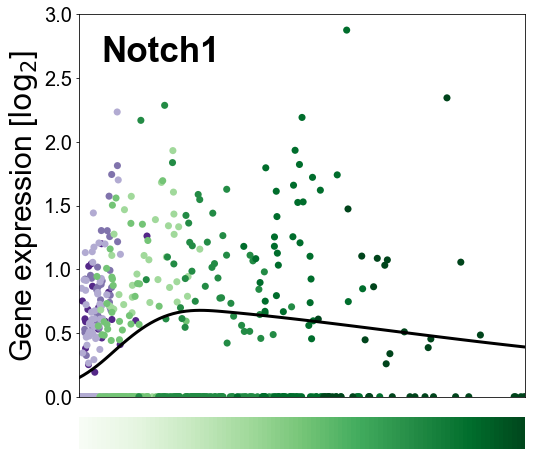

In [262]:
g = 'Notch1'

dpt = dpt_ANA_CX
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CX.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Greens
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CX_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

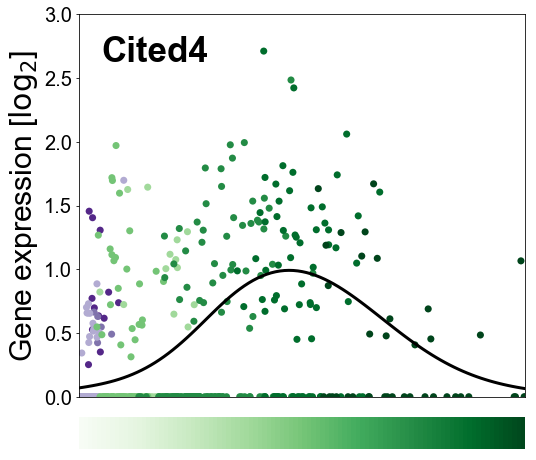

In [263]:
g = 'Cited4'

dpt = dpt_ANA_CX
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CX.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Greens
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CX_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

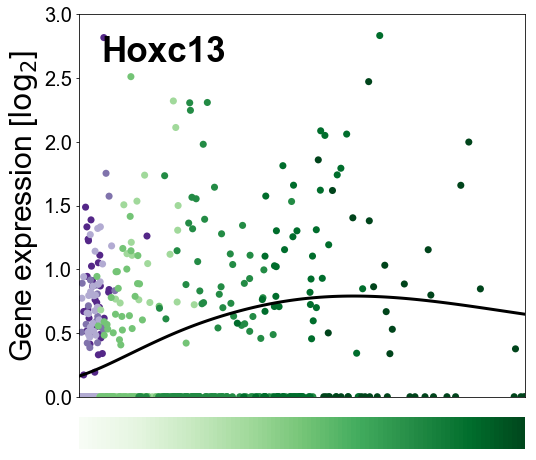

In [264]:
g = 'Hoxc13'

dpt = dpt_ANA_CX
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_CX.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Greens
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_CX_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Transcription factors

In [56]:
TF_CX = ['Mxd3','Hoxb8',
         'Ybx1','Notch1',
         'Cited4','Hoxc13',
         'Nfe2l3','Grhl1',]

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:87: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


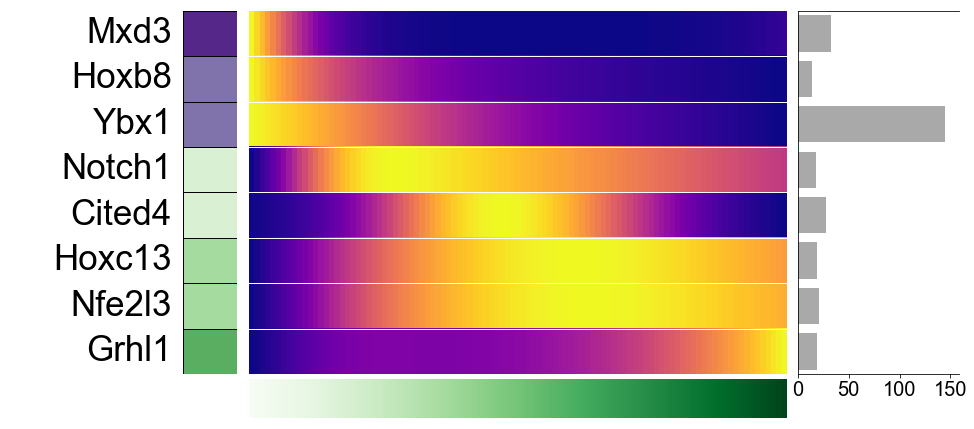

In [57]:
TF_sel = TF_CX
TF_sel_un = []
splines = CX_fitted_norm
p_val = -np.log10(ANA_stats_CX['Pr(>Chisq)-BH_null'].astype(float))
cutoff = -np.log10(0.001)
gene_groups = cl_g_PT_CX
cmap_gene_groups = {5:'#542788',4:'#8073ac',0:'#b2abd2',1:'#d8daeb',6:'#d9f0d3',2:'#a6dba0',7:'#5aae61',3:'#1b7837'}
cmap_splines = plt.cm.plasma
cmap_colorbar = plt.cm.Greens

#initialize figure

height = 7.5
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[7,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(TF_sel) - 0.5, -0.5)

for pos, g in enumerate(TF_sel):
    if g in TF_sel_un:
        ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center', fontweight = 'bold')
    else:
        ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(TF_sel), 0.0)

lw = 1

for pos, g in enumerate(TF_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[TF_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(TF_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[TF_sel].max() * 1.1)
ax.set_ylim(len(TF_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(TF_sel))], 
        width = p_val.ix[TF_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_TF_CX.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Model pseudotime - inner root sheath

In [58]:
ANA_fitted_IRS = ANA_fitted.loc['IRS'][ANA_fitted.columns[0:97]]
ANA_stats_IRS = ANA_stats.loc['IRS']

In [59]:
cl_g_PT_IRS = loadData_v1(path_output, exp_id, 'cl_g_PT_IRS', 'Series')

## Heatmap - all significant genes¶

In [60]:
IRS_fitted_norm = np.log2(ANA_fitted_IRS.astype(float) + 1).apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=1)

In [61]:
cl_g_PT_IRS = AP_groups_reorder_v2(cl_g_PT_IRS, [1,2,6,7,0,4,5,3])

In [62]:
IRS_bins = PTO_bin_axis(dpt_ANA_IRS, 10, (0.0,1.01), range(10))[1]

In [63]:
cc_score_IRS = pd.DataFrame(index = return_unique(IRS_bins), columns = ['G1','S/G2M'])

for b in return_unique(IRS_bins):
    c_tmp = IRS_bins[IRS_bins==b].index
    cc_score_IRS.loc[b,'G1'] = np.sum(cc_score_v2.loc[c_tmp]=='G1')
    cc_score_IRS.loc[b,'S/G2M'] = np.sum(cc_score_v2.loc[c_tmp]=='S') +  np.sum(cc_score_v2.loc[c_tmp]=='G2M')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


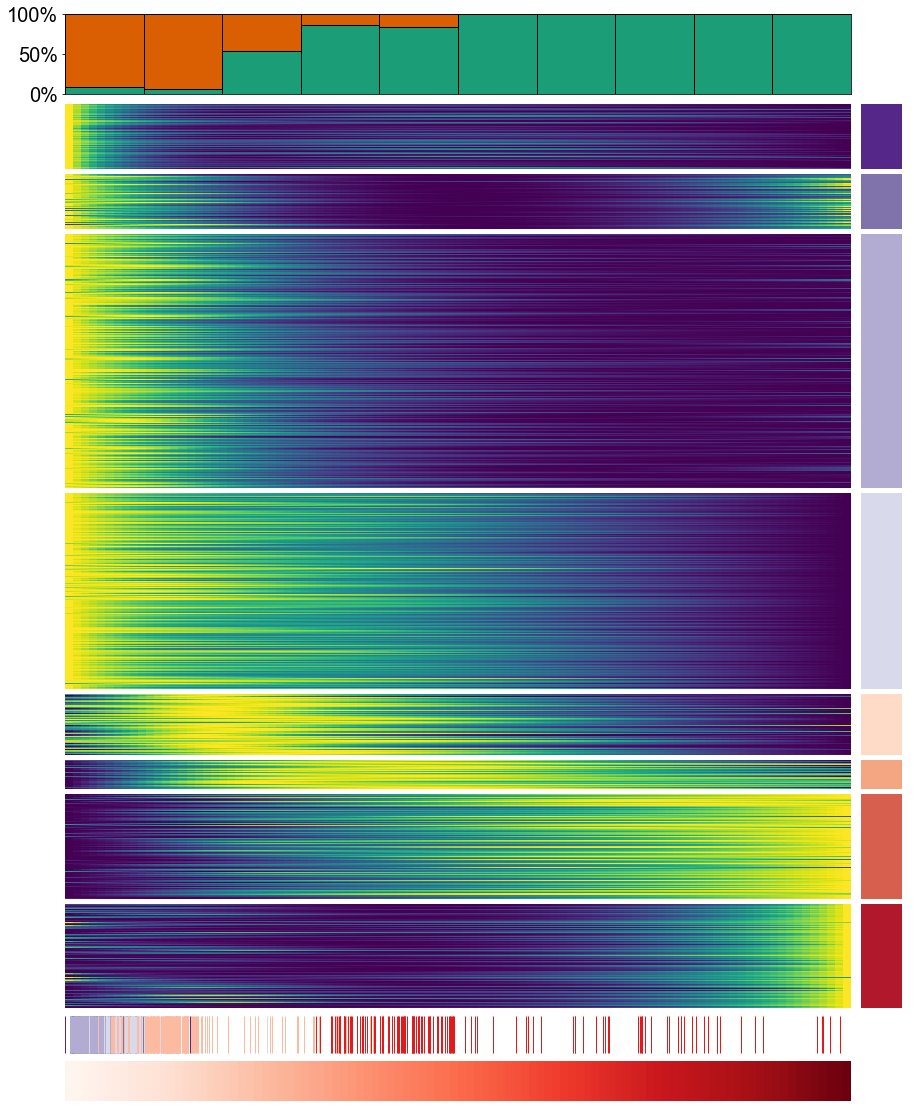

In [57]:
dataset = IRS_fitted_norm
cell_groups = cl_c_ANA
gene_groups = cl_g_PT_IRS
bins = IRS_bins
cc = cc_score_IRS.apply(lambda x: x / np.sum(x), axis = 1)
PTO_coords = dpt_ANA_IRS
cmap = cmap_2nd
cmap_g = {1:'#542788',2:'#8073ac',6:'#b2abd2',7:'#d8daeb',0:'#fddbc7',4:'#f4a582',5:'#d6604d',3:'#b2182b',}
nmap_g = None

#initialize figure

height = 20
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(4, 2, hspace=0.025, wspace=0.025, height_ratios=[1.5,17,0.75,0.75], width_ratios = [14.25,0.75])

#draw heatmap in pseudotime

dataset = dataset.loc[gene_groups.index]
ax0 = plt.subplot(gs1[1,0])
ax0.set_ylim(len(dataset.index), 0)
ax0.matshow(dataset, aspect = 'auto', cmap = plt.cm.viridis, vmin = 0, vmax = 1.0)
clean_axis(ax0)

#PTO coords

ax1 = plt.subplot(gs1[2,0])
ax1.set_xlim(0, np.max(PTO_coords))
for ix in PTO_coords.index:
    ax1.vlines(x = PTO_coords[ix], ymin = 0, ymax = 1, 
               color = cmap[cell_groups[ix]], linewidth = 1.0)
clean_axis(ax1)

#PTO colormap

ax2 = plt.subplot(gs1[3,0])
ax2.set_xlim(0,1)
for pos in np.arange(0,1,0.01):
    ax2.axvspan(pos, pos + 0.01, color = plt.cm.Reds(pos))    
clean_axis(ax2)

#gene group identity

ax3 = plt.subplot(gs1[1,1])
ax3.set_ylim(len(dataset.index),0)
for pos, gr in enumerate(gene_groups.values):
    ax3.axhspan(pos, pos + 1, color = cmap_g[gr])  
clean_axis(ax3)

#draw lines

for gr in set(gene_groups): 
    pos = list(gene_groups).index(gr)   
    ax0.axhline(pos, color = 'white', linewidth = 5)
    ax3.axhline(pos, color = 'white', linewidth = 5)
    
#cell cycle stage

ax4 = plt.subplot(gs1[0,0])

ax4.set_xlim(-0.5, len(set(bins))-0.5)
ax4.set_xticks([])
ax4.set_ylim(0,1)
ax4.set_yticks([0.0,0.5,1.0])
ax4.set_yticklabels(['0%','50%','100%'], family = 'Arial', fontsize = 20)


for pos, b in enumerate(return_unique(bins)):
    ax4.bar(x = pos, height = cc.loc[b,'G1'], 
            color = '#1b9e77', width = 1, linewidth = 1, edgecolor = 'black')
    ax4.bar(x = pos, bottom = cc.loc[b,'G1'], height = cc.loc[b,'S/G2M'], 
            color = '#d95f02', width = 1, linewidth = 1, edgecolor = 'black')
    
figname = 'v1.5_Fig5_diff_hm_IRS.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Example genes

In [64]:
genes_sel_IRS = ['Mt2',
                 'Calm2',
                 'Hmgb2',
                 'Tmsb10',
                 'Ctsb','Lypd3','Mgst1',
                 'Ctsc','Taf13','Tmem45a',
                 'Hspb1','Krt71','Krt28',
                 'Tchh','Padi3','Bambi']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:82: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


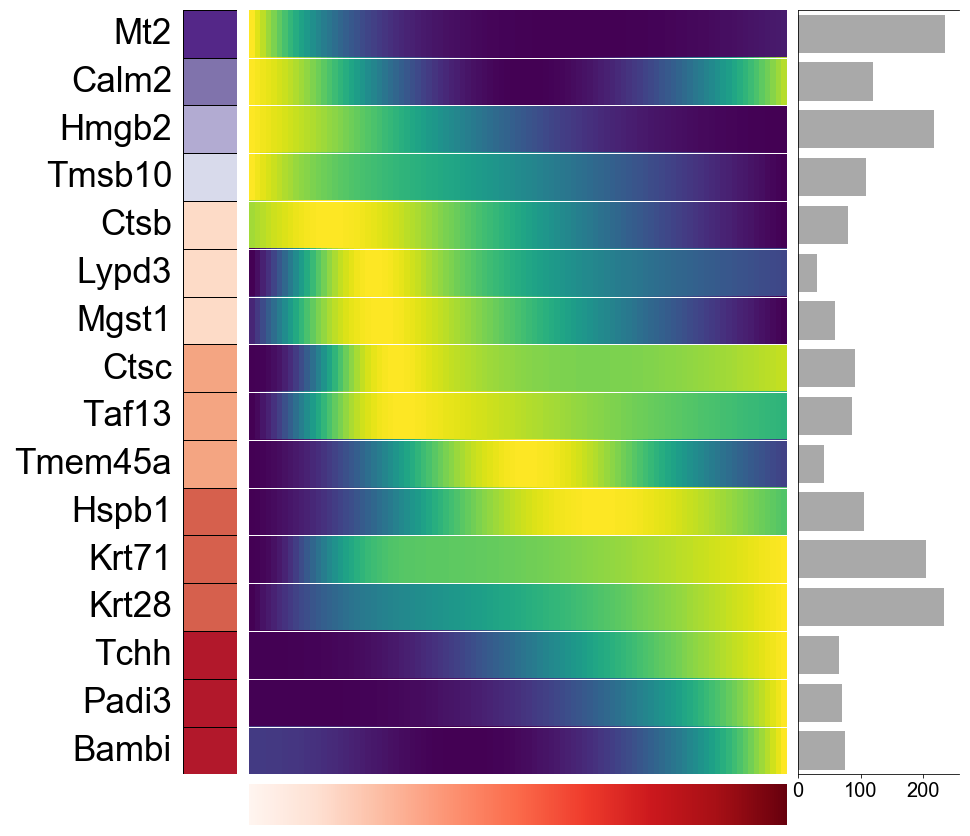

In [65]:
gene_sel = genes_sel_IRS
splines = IRS_fitted_norm
p_val = -np.log10(ANA_stats_IRS['Pr(>Chisq)-BH_null'].astype(float))
cutoff = -np.log10(0.001)
gene_groups = cl_g_PT_IRS
cmap_gene_groups = {1:'#542788',2:'#8073ac',6:'#b2abd2',7:'#d8daeb',0:'#fddbc7',4:'#f4a582',5:'#d6604d',3:'#b2182b',}
cmap_splines = plt.cm.viridis
cmap_colorbar = plt.cm.Reds

#initialize figure

height = 15
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[14,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel) - 0.5, -0.5)

for pos, g in enumerate(gene_sel):
    ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel), 0.0)

lw = 1

for pos, g in enumerate(gene_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[gene_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(gene_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[gene_sel].max() * 1.1)
ax.set_ylim(len(gene_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(gene_sel))], 
        width = p_val.ix[gene_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_marker_IRS.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Plot individual example genes

In [243]:
dpt_ANA_IRS = loadData_v1(path_output, exp_id, 'dpt_ANA_IRS', 'Series')

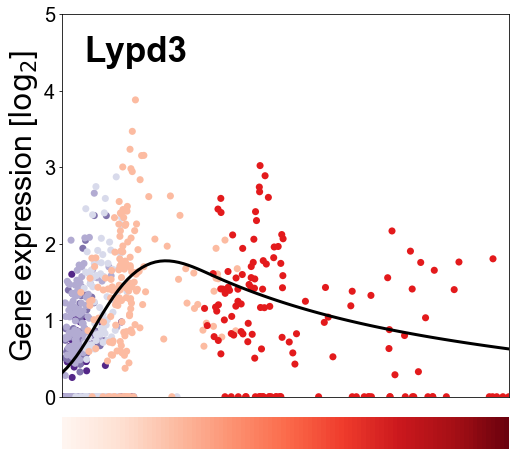

In [244]:
g = 'Lypd3'

dpt = dpt_ANA_IRS
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 5)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

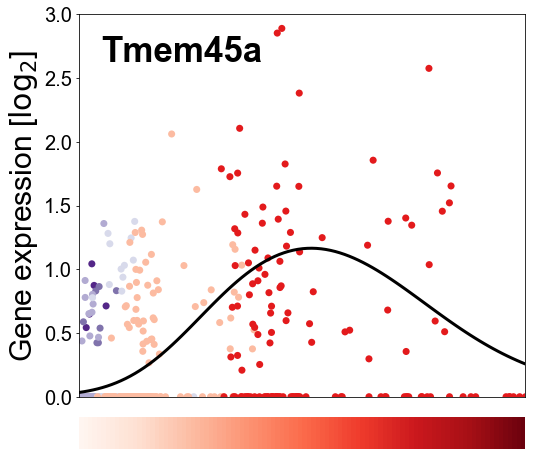

In [245]:
g = 'Tmem45a'

dpt = dpt_ANA_IRS
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

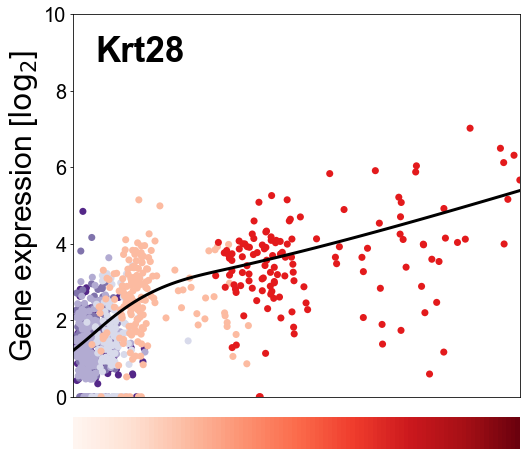

In [246]:
g = 'Krt28'

dpt = dpt_ANA_IRS
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 10)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

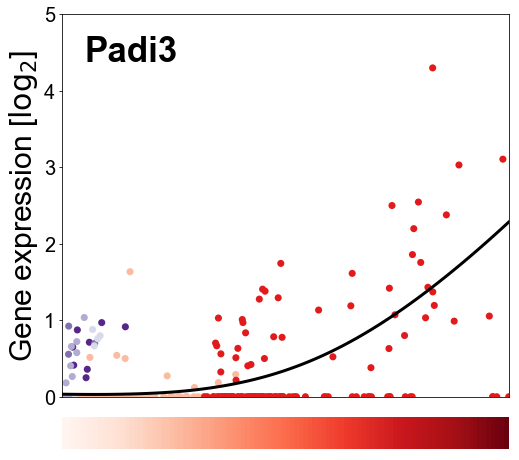

In [247]:
g = 'Padi3'

dpt = dpt_ANA_IRS
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 5)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

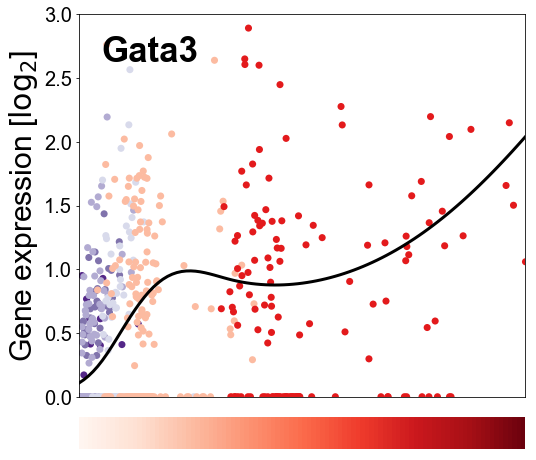

In [248]:
g = 'Gata3'

dpt = dpt_ANA_IRS
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

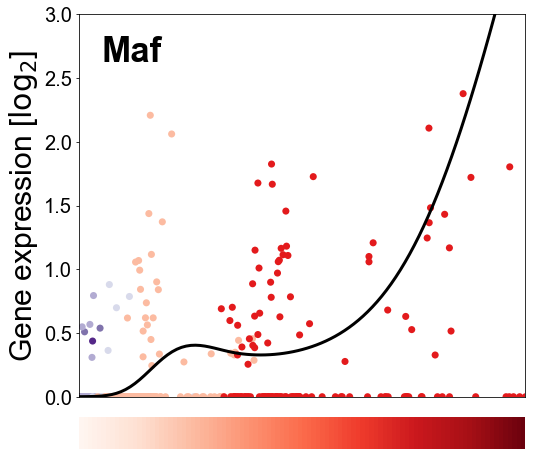

In [249]:
g = 'Maf'

dpt = dpt_ANA_IRS
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS.loc[g].astype(float) + 1)
groups = cl_c_ANA
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Transcription factors

In [66]:
TF_IRS = ['Ezh2','Ybx1','Pou3f1','Klf4','Cux1','Grhl1','Gata3','Maf']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:86: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


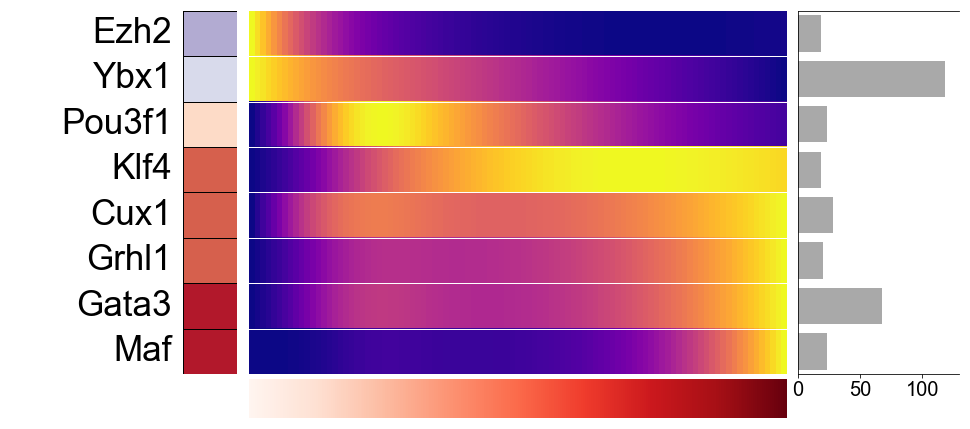

In [67]:
TF_sel = TF_IRS
TF_sel_un = []
splines = IRS_fitted_norm
p_val = -np.log10(ANA_stats_IRS['Pr(>Chisq)-BH_null'].astype(float))
cutoff = -np.log10(0.001)
gene_groups = cl_g_PT_IRS
cmap_gene_groups = {1:'#542788',2:'#8073ac',6:'#b2abd2',7:'#d8daeb',0:'#fddbc7',4:'#f4a582',5:'#d6604d',3:'#b2182b',}
cmap_splines = plt.cm.plasma
cmap_colorbar = plt.cm.Reds

#initialize figure

height = 7.5
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[7,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(TF_sel) - 0.5, -0.5)

for pos, g in enumerate(TF_sel):
    if g in TF_sel_un:
        ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center', fontweight = 'bold')
    else:
        ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(TF_sel), 0.0)

lw = 1

for pos, g in enumerate(TF_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[TF_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(TF_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[TF_sel].max() * 1.1)
ax.set_ylim(len(TF_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(TF_sel))], 
        width = p_val.ix[TF_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_TF_IRS.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Plot comparative transcription factor profiles

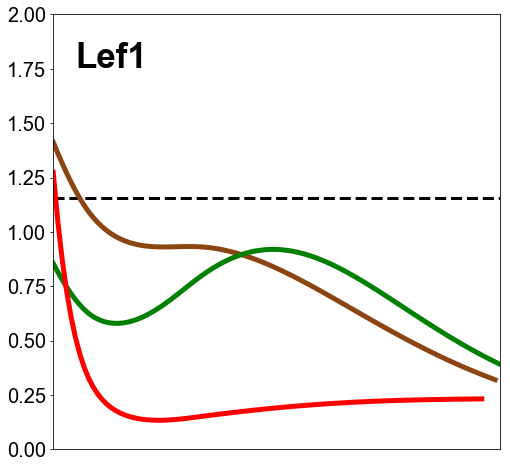

In [119]:
g = 'Lef1'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 2)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

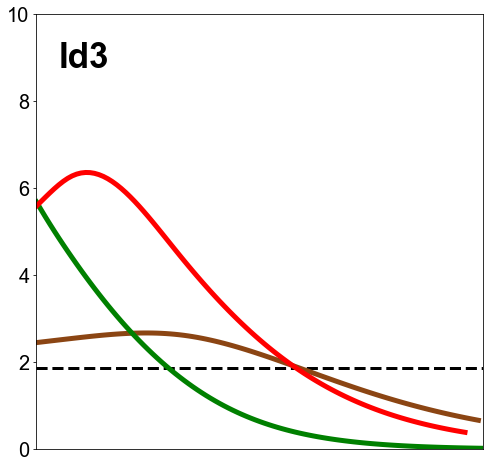

In [120]:
g = 'Id3'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 10)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

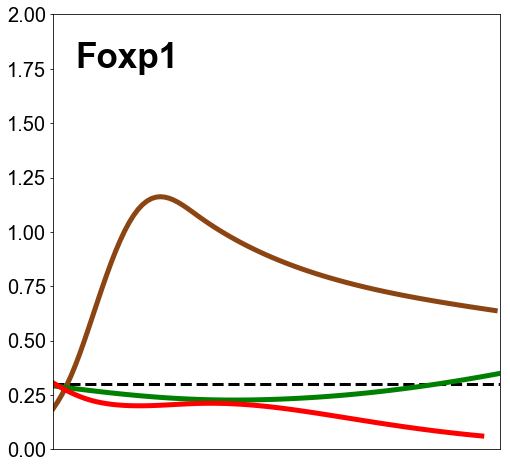

In [121]:
g = 'Foxp1'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 2)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

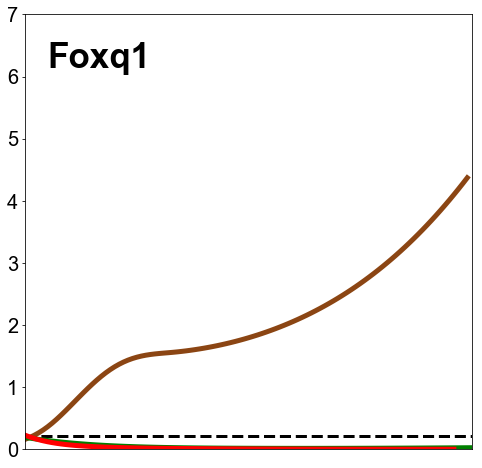

In [122]:
g = 'Foxq1'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 7)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

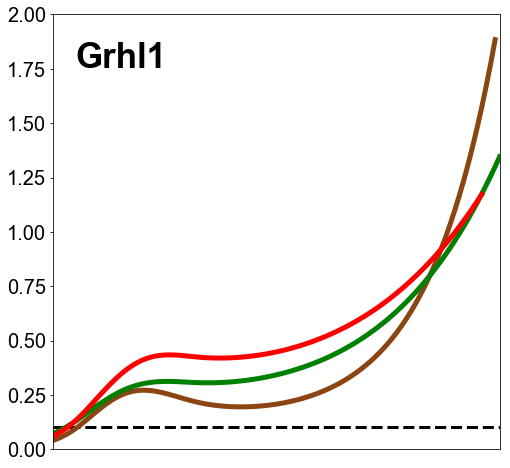

In [123]:
g = 'Grhl1'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 2)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

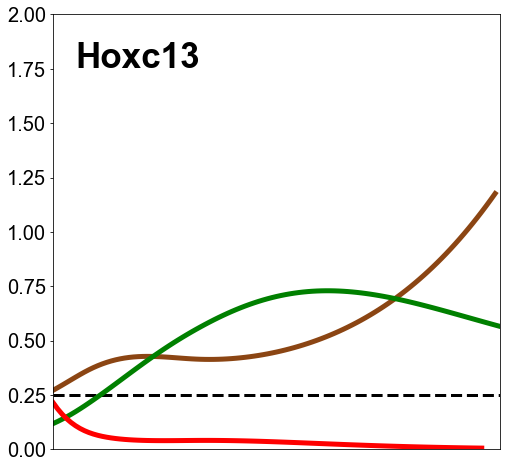

In [124]:
g = 'Hoxc13'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 2)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

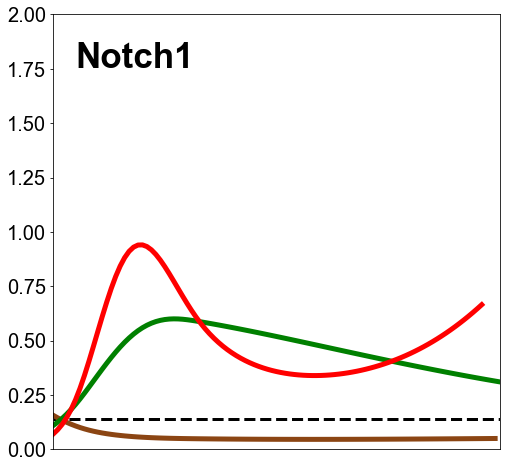

In [125]:
g = 'Notch1'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 2)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

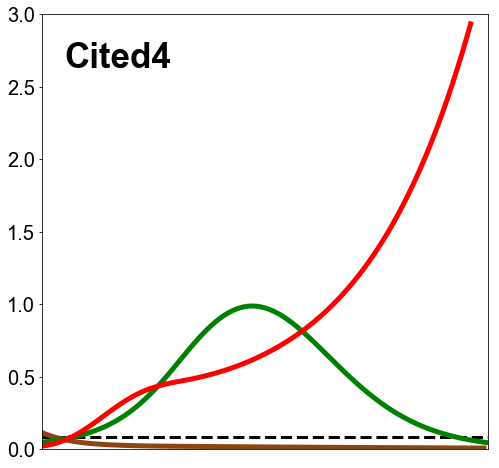

In [126]:
g = 'Cited4'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

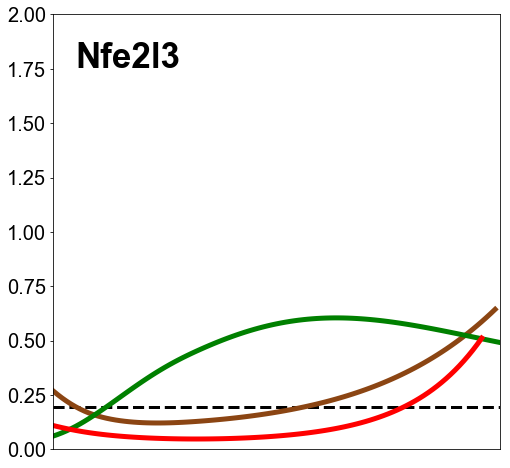

In [127]:
g = 'Nfe2l3'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 2)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

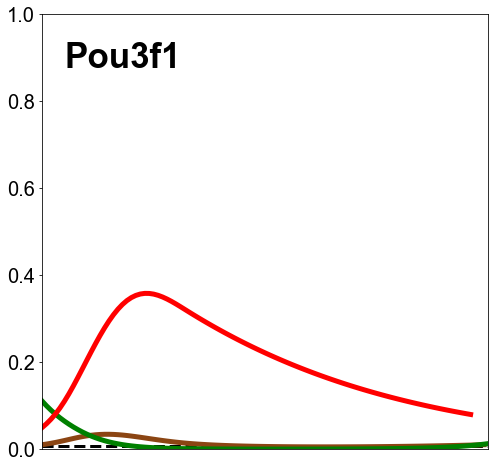

In [128]:
g = 'Pou3f1'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 1)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

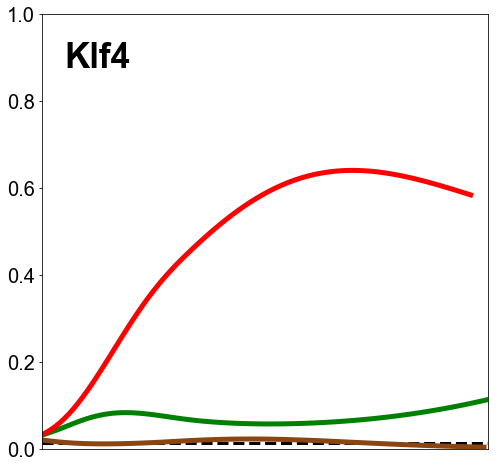

In [129]:
g = 'Klf4'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 1)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

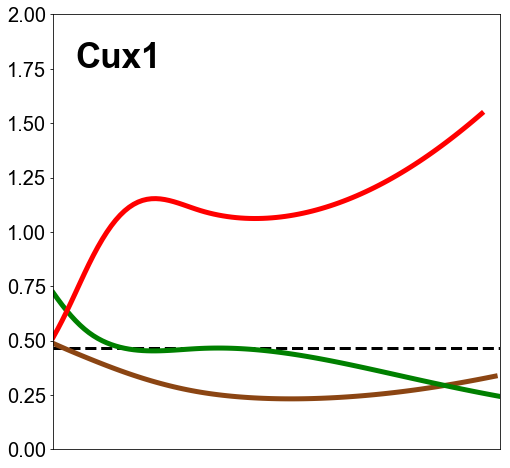

In [130]:
g = 'Cux1'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 2)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

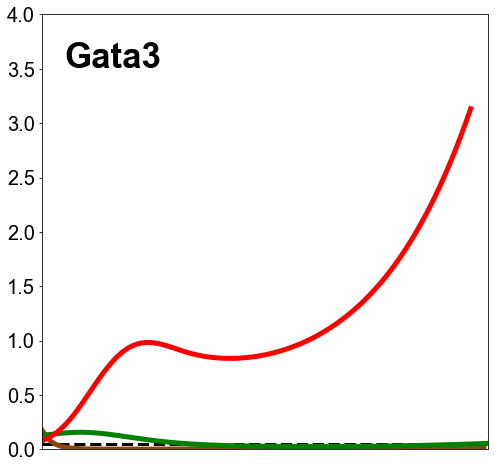

In [131]:
g = 'Gata3'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 4)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

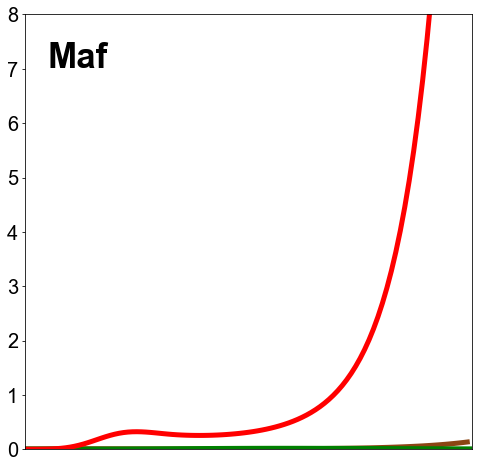

In [132]:
g = 'Maf'
fit_null = ANA_fitted.loc['null'].loc[g]
fit_all = ANA_fitted.loc['all'].loc[g]
fit_CL = ANA_fitted_CL.loc[g]
fit_CX = ANA_fitted_CX.loc[g]
fit_IRS = ANA_fitted_IRS.loc[g]

ylim = (0, 8)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot CL

ax1.plot(fit_CL.index,
         fit_CL.values,
         color = 'saddlebrown',
         linewidth = 5)

#plot CX

ax1.plot(fit_CX.index,
         fit_CX.values,
         color = 'green',
         linewidth = 5)

#plot IRS

ax1.plot(fit_IRS.index,
         fit_IRS.values,
         color = 'red',
         linewidth = 5)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Plot diffusion map - IRS

In [34]:
diffmap_IRS = loadData_v1(path_output, exp_id, 'diffmap_IRS', 'DataFrame')

In [35]:
dpt_IRS = loadData_v1(path_output, exp_id, 'dpt_IRS','Series')

In [36]:
dpt_ANA_IRS1 = loadData_v1(path_output, exp_id, 'dpt_ANA_IRS1','Series')
dpt_ANA_IRS2 = loadData_v1(path_output, exp_id, 'dpt_ANA_IRS2','Series')

## Plot groups

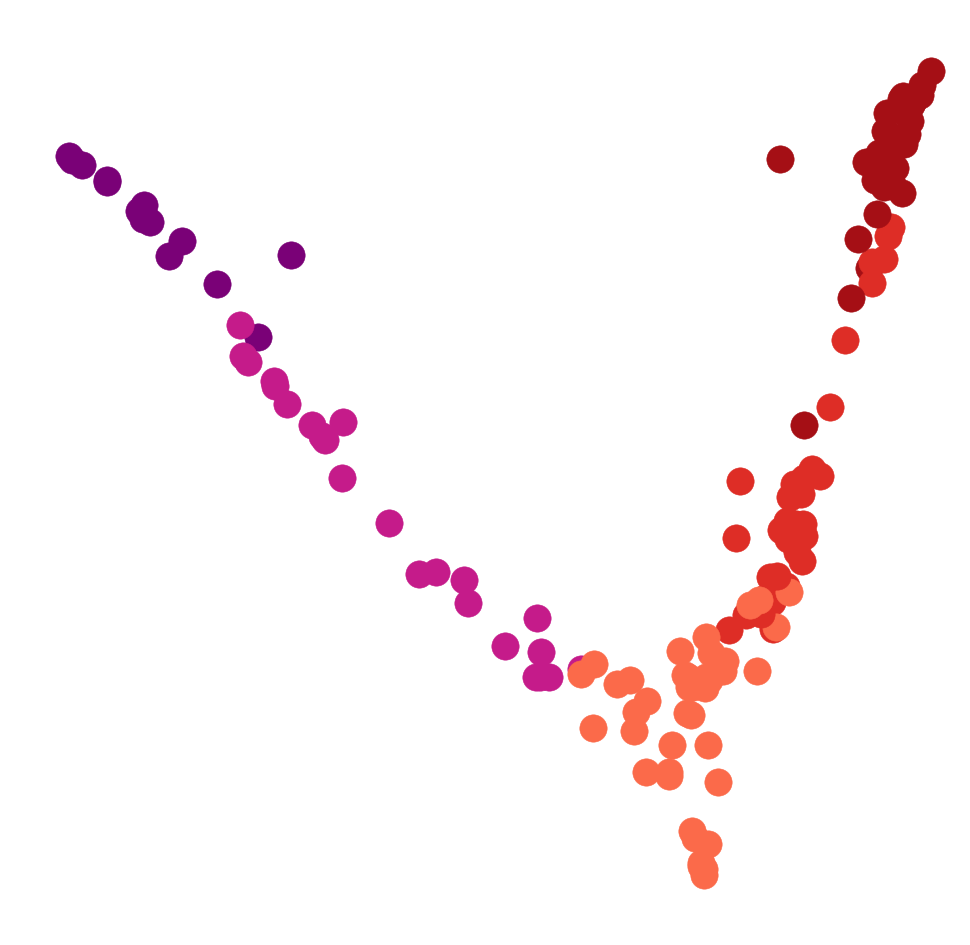

In [191]:
cells = cl_c_ANA_IRS
tsne = diffmap_IRS.loc[dpt_IRS.index]
cmap = cmap_2nd
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in index:

    ax1.scatter(tsne.loc[ix,'x'],
                tsne.loc[ix,'y'], 
                s = 750,
                linewidth = 0.5,
                c = cmap[cells[ix]],
                edgecolor=cmap[cells[ix]], 
                marker = markers[time[ix]], 
                alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_PTO_IRS1_2_diam.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

### Plot individual pseudotimes

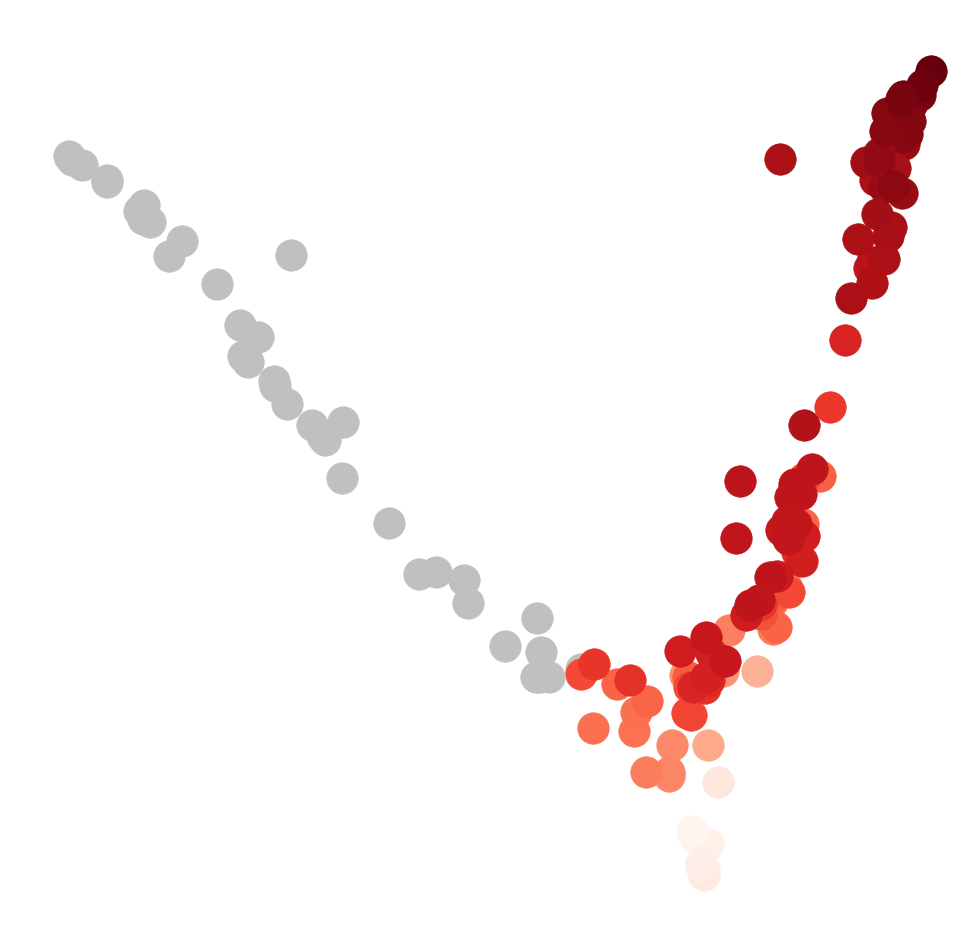

In [192]:
cells = cl_c_ANA
tsne = diffmap_IRS.loc[dpt_IRS.index]
coords = dpt_ANA_IRS1.copy()
coords /= coords.max()
cmap = plt.cm.Reds
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in index:
    
    if ix not in coords:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 1000,
                    linewidth = 0.5,
                    c = 'silver',
                    edgecolor='silver', 
                    marker = markers[time[ix]], 
                    alpha = 1)
    else:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 1000,
                    linewidth = 0.5,
                    c = cmap(coords[ix]),
                    edgecolor=cmap(coords[ix]), 
                    marker = markers[time[ix]], 
                    alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_PTO_IRS1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

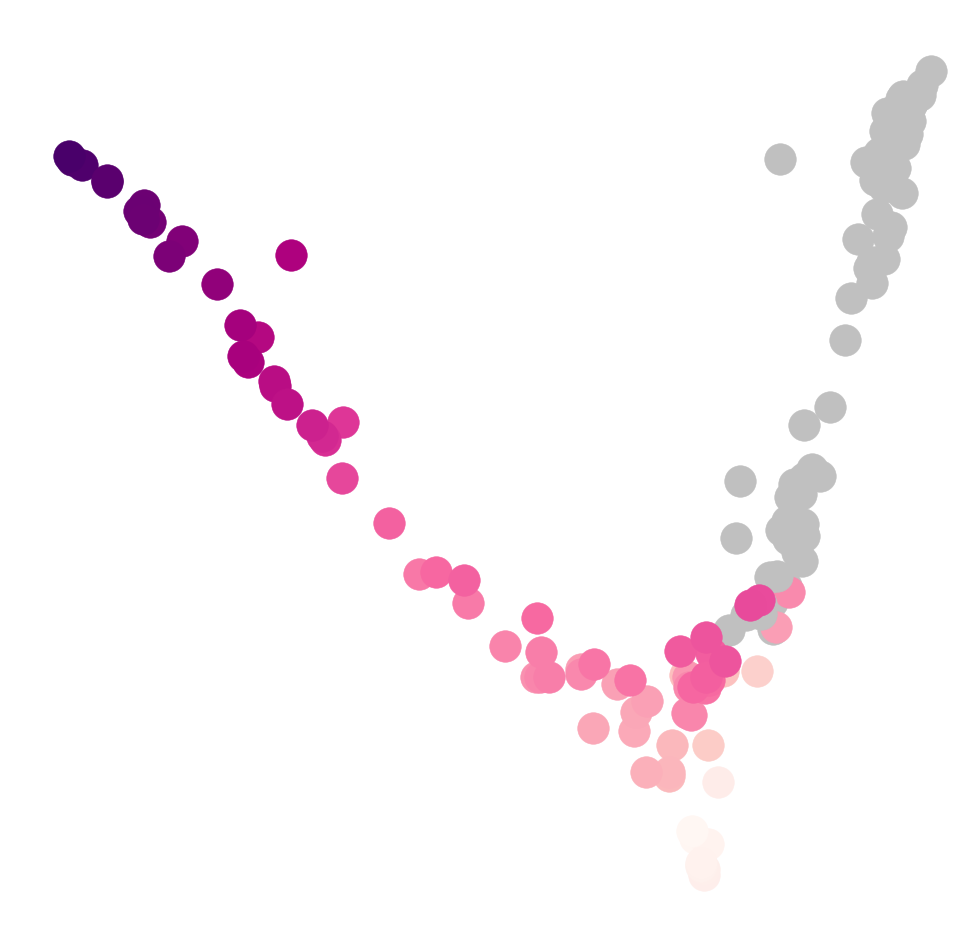

In [193]:
cells = cl_c_ANA
tsne = diffmap_IRS.loc[dpt_IRS.index]
coords = dpt_ANA_IRS2.copy()
coords /= coords.max()
cmap = plt.cm.RdPu
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']) * 1.1, np.max(tsne['x']) * 1.1
y_min, y_max = np.min(tsne['y']) * 1.1, np.max(tsne['y']) * 1.1
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 0.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = tsne['z'].sort_values()[::-1].index

for ix in index:
    
    if ix not in coords:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 1000,
                    linewidth = 0.5,
                    c = 'silver',
                    edgecolor='silver', 
                    marker = markers[time[ix]], 
                    alpha = 1)
    else:
        ax1.scatter(tsne.loc[ix,'x'],
                    tsne.loc[ix,'y'], 
                    s = 1000,
                    linewidth = 0.5,
                    c = cmap(coords[ix]),
                    edgecolor=cmap(coords[ix]), 
                    marker = markers[time[ix]], 
                    alpha = 1)

clean_axis(ax1)

figname = 'v1.5_Fig5_diffmap_PTO_IRS2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Model pseudotime - IRS1

In [68]:
ANA_IRS_fitted = loadData_from_pickle_v1(path_output, exp_id, 'ANA_IRS_fitted')
ANA_IRS_stats = loadData_from_pickle_v1(path_output, exp_id, 'ANA_IRS_stats')

In [69]:
ANA_fitted_IRS1 = ANA_IRS_fitted.loc['IRS1'][ANA_IRS_fitted.columns[0:73]]
ANA_stats_IRS1 = ANA_IRS_stats.loc['IRS1']

In [70]:
cl_g_PT_IRS1 = loadData_v1(path_output, exp_id, 'cl_g_PT_IRS1', 'Series')

## Heatmap - all significant genes

In [71]:
IRS1_fitted_norm = np.log2(ANA_fitted_IRS1.astype(float) + 1).apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=1)

In [72]:
cl_g_PT_IRS1 = AP_groups_reorder_v2(cl_g_PT_IRS1, [0,2,1])

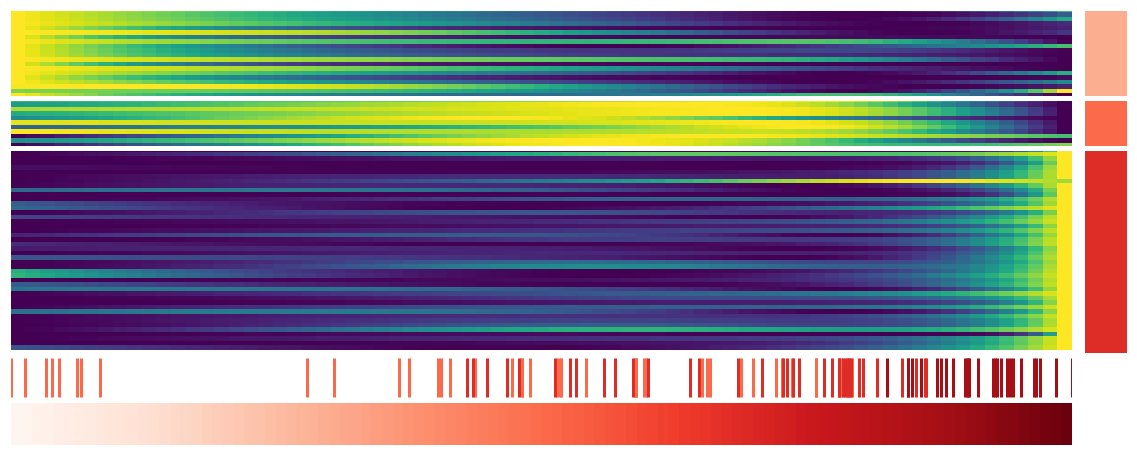

In [200]:
dataset = IRS1_fitted_norm
cell_groups = cl_c_ANA_IRS
gene_groups = cl_g_PT_IRS1
PTO_coords = dpt_ANA_IRS1
cmap = cmap_2nd
cmap_g = {0:'#fcae91',2:'#fb6a4a',1:'#de2d26'}
nmap_g = None

#initialize figure

height = 8
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(3, 2, hspace=0.025, wspace=0.025, height_ratios=[6,0.75,0.75], width_ratios = [19.25,0.75])

#draw heatmap in pseudotime

dataset = dataset.loc[gene_groups.index]
ax0 = plt.subplot(gs1[0,0])
ax0.set_ylim(len(dataset.index), 0)
ax0.matshow(dataset, aspect = 'auto', cmap = plt.cm.viridis, vmin = 0, vmax = 1.0)
clean_axis(ax0)

#PTO coords

ax1 = plt.subplot(gs1[1,0])
ax1.set_xlim(0, np.max(PTO_coords))
for ix in PTO_coords.index:
    ax1.vlines(x = PTO_coords[ix], ymin = 0, ymax = 1, 
               color = cmap[cell_groups[ix]], linewidth = 3.0)
clean_axis(ax1)

#PTO colormap

ax2 = plt.subplot(gs1[2,0])
ax2.set_xlim(0,1)
for pos in np.arange(0,1,0.01):
    ax2.axvspan(pos, pos + 0.01, color = plt.cm.Reds(pos))    
clean_axis(ax2)

#gene group identity

ax3 = plt.subplot(gs1[0,1])
ax3.set_ylim(len(dataset.index),0)
for pos, gr in enumerate(gene_groups.values):
    ax3.axhspan(pos, pos + 1, color = cmap_g[gr])  
clean_axis(ax3)

#draw lines

for gr in set(gene_groups): 
    pos = list(gene_groups).index(gr)   
    ax0.axhline(pos-0.5, color = 'white', linewidth = 5)
    ax3.axhline(pos-0.5, color = 'white', linewidth = 5)
    
figname = 'v1.5_Fig5_diff_hm_IRS1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Marker genes

In [73]:
genes_sel_IRS1 = ['Tkt',
                  'Npm1',
                  'Dmkn','Krt71','Crym','Krt25']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:57: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:83: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


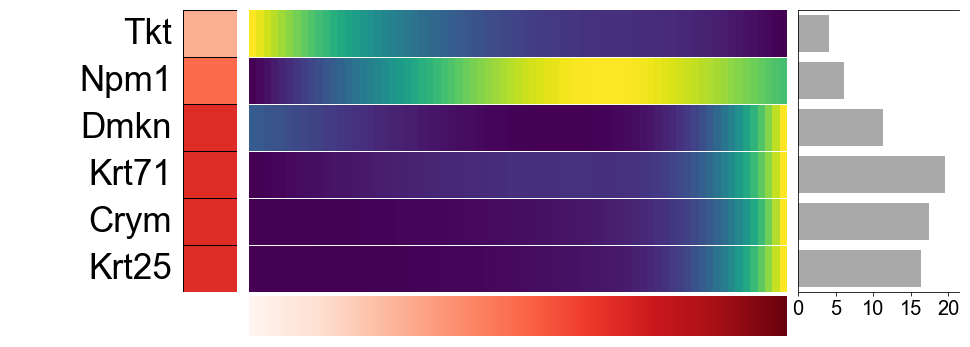

In [74]:
gene_sel = genes_sel_IRS1
splines = IRS1_fitted_norm
p_val = -np.log10(ANA_stats_IRS1['Pr(>Chisq)-BH_null'].astype(float))
p_val[np.isinf(p_val)] = 300
cutoff = -np.log10(0.01)
gene_groups = cl_g_PT_IRS1
cmap_gene_groups = {0:'#fcae91',2:'#fb6a4a',1:'#de2d26'}
cmap_splines = plt.cm.viridis
cmap_colorbar = plt.cm.Reds

#initialize figure

height = 6
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[5.25,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel) - 0.5, -0.5)

for pos, g in enumerate(gene_sel):
    ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel), 0.0)

lw = 1

for pos, g in enumerate(gene_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[gene_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(gene_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[gene_sel].max() * 1.1)
ax.set_ylim(len(gene_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(gene_sel))], 
        width = p_val.ix[gene_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_marker_IRS1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Plot individual example genes

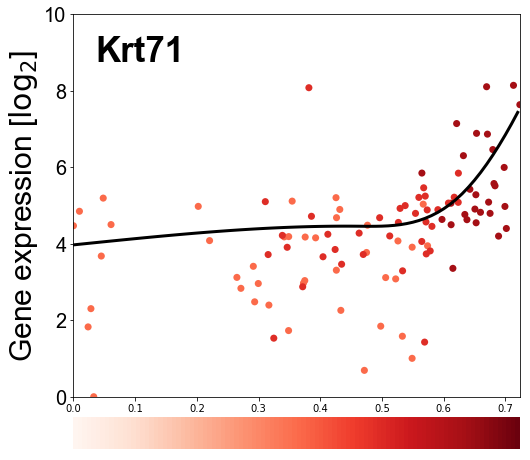

In [203]:
g = 'Krt71'

dpt = dpt_ANA_IRS1
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS1.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 10)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
#ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS1_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

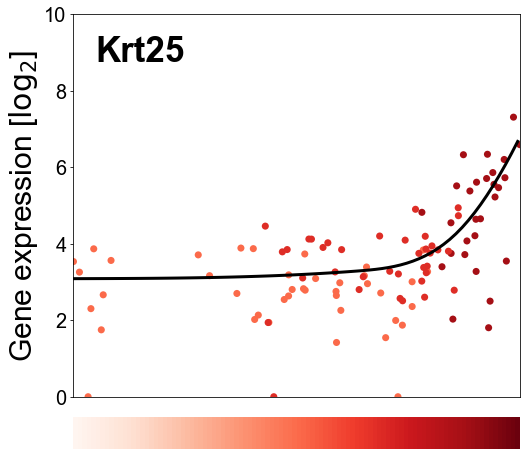

In [204]:
g = 'Krt25'

dpt = dpt_ANA_IRS1
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS1.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 10)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS1_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Transcription factors

In [75]:
TF_sel_IRS1 = ['Maf','Mafb','Sp6',]

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:82: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


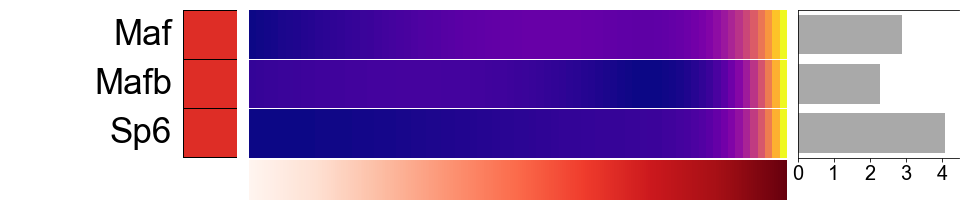

In [76]:
gene_sel = TF_sel_IRS1
splines = IRS1_fitted_norm
p_val = -np.log10(ANA_stats_IRS1['Pr(>Chisq)-BH_null'].astype(float))
cutoff = -np.log10(0.01)
gene_groups = cl_g_PT_IRS1
cmap_gene_groups = {0:'#fcae91',2:'#fb6a4a',1:'#de2d26'}
cmap_splines = plt.cm.plasma
cmap_colorbar = plt.cm.Reds

#initialize figure

height = 3.5
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[2.75,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel) - 0.5, -0.5)

for pos, g in enumerate(gene_sel):
    ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel), 0.0)

lw = 1

for pos, g in enumerate(gene_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[gene_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(gene_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[gene_sel].max() * 1.1)
ax.set_ylim(len(gene_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(gene_sel))], 
        width = p_val.ix[gene_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_TF_IRS1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Plot individual example genes

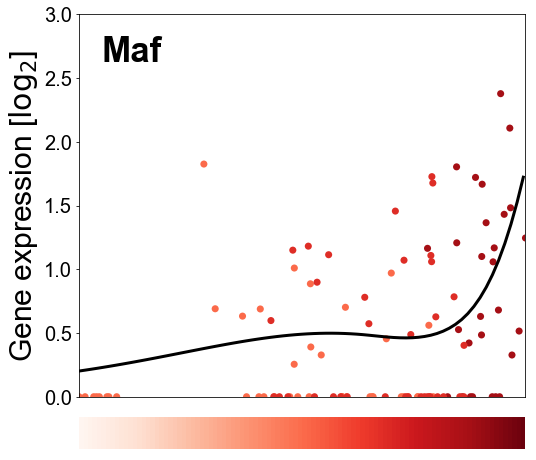

In [209]:
g = 'Maf'

dpt = dpt_ANA_IRS1
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS1.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS1_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

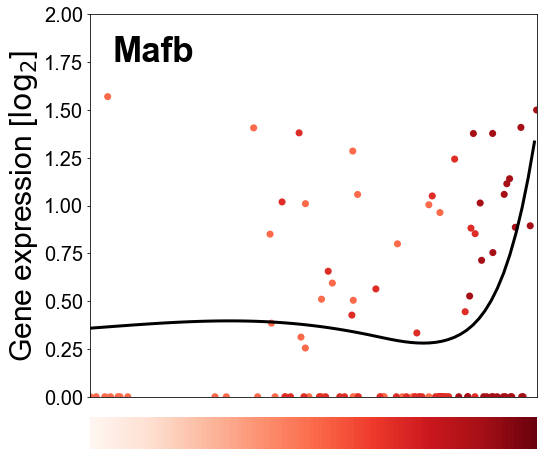

In [210]:
g = 'Mafb'

dpt = dpt_ANA_IRS1
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS1.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 2)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS1_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

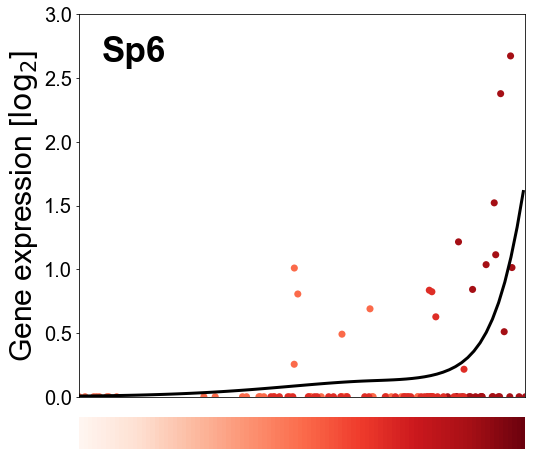

In [211]:
g = 'Sp6'

dpt = dpt_ANA_IRS1
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS1.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.Reds
ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS1_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Model pseudotime - IRS2

In [77]:
ANA_fitted_IRS2 = ANA_IRS_fitted.loc['IRS2'][ANA_IRS_fitted.columns[0:]]
ANA_stats_IRS2 = ANA_IRS_stats.loc['IRS2']

In [78]:
cl_g_PT_IRS2 = loadData_v1(path_output, exp_id, 'cl_g_PT_IRS2', 'Series')

## Heatmap - all significant genes

In [79]:
IRS2_fitted_norm = np.log2(ANA_fitted_IRS2.astype(float) + 1).apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=1)

In [80]:
cl_g_PT_IRS2 = AP_groups_reorder_v2(cl_g_PT_IRS2, [0,2,1])

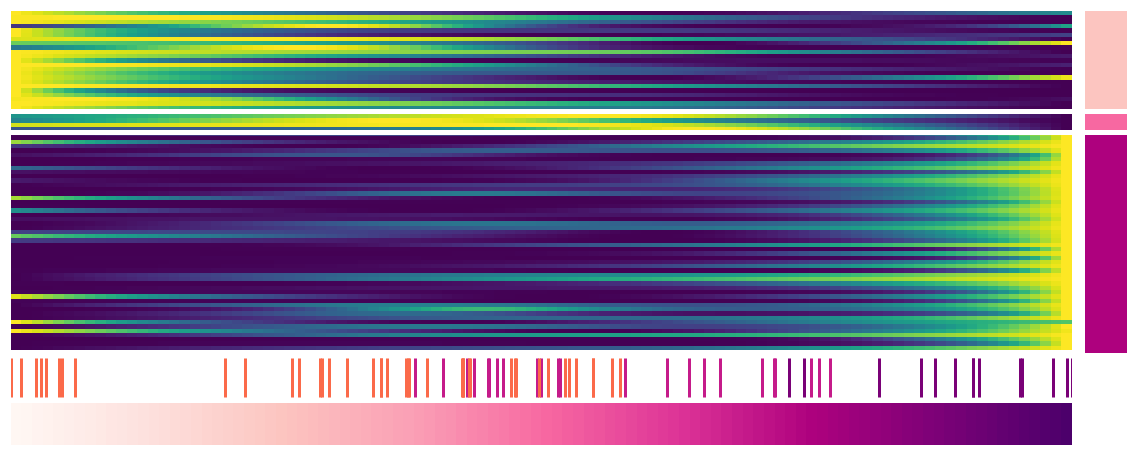

In [216]:
dataset = IRS2_fitted_norm
cell_groups = cl_c_ANA_IRS
gene_groups = cl_g_PT_IRS2
PTO_coords = dpt_ANA_IRS2
cmap = cmap_2nd
cmap_g = {0:'#fcc5c0',2:'#f768a1',1:'#ae017e'}
nmap_g = None

#initialize figure

height = 8
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(3, 2, hspace=0.025, wspace=0.025, height_ratios=[6,0.75,0.75], width_ratios = [19.25,0.75])

#draw heatmap in pseudotime

dataset = dataset.loc[gene_groups.index]
ax0 = plt.subplot(gs1[0,0])
ax0.set_ylim(len(dataset.index), 0)
ax0.matshow(dataset, aspect = 'auto', cmap = plt.cm.viridis, vmin = 0, vmax = 1.0)
clean_axis(ax0)

#PTO coords

ax1 = plt.subplot(gs1[1,0])
ax1.set_xlim(0, np.max(PTO_coords))
for ix in PTO_coords.index:
    ax1.vlines(x = PTO_coords[ix], ymin = 0, ymax = 1, 
               color = cmap[cell_groups[ix]], linewidth = 3.0)
clean_axis(ax1)

#PTO colormap

ax2 = plt.subplot(gs1[2,0])
ax2.set_xlim(0,1)
for pos in np.arange(0,1,0.01):
    ax2.axvspan(pos, pos + 0.01, color = plt.cm.RdPu(pos))    
clean_axis(ax2)

#gene group identity

ax3 = plt.subplot(gs1[0,1])
ax3.set_ylim(len(dataset.index),0)
for pos, gr in enumerate(gene_groups.values):
    ax3.axhspan(pos, pos + 1, color = cmap_g[gr])  
clean_axis(ax3)

#draw lines

for gr in set(gene_groups): 
    pos = list(gene_groups).index(gr)   
    ax0.axhline(pos-0.5, color = 'white', linewidth = 5)
    ax3.axhline(pos-0.5, color = 'white', linewidth = 5)
    
figname = 'v1.5_Fig5_diff_hm_IRS2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Marker genes

In [81]:
genes_sel_IRS2 = ['Krt71',
                  'Clta',
                  'Krt73','Crym','Fbp1','Cryba4']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:82: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


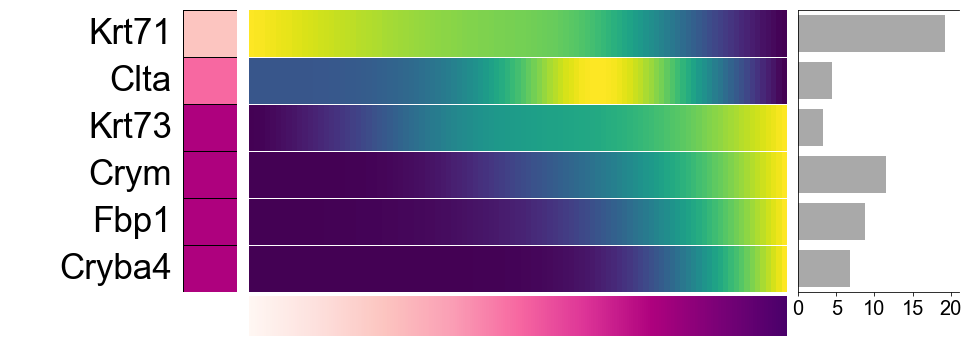

In [82]:
gene_sel = genes_sel_IRS2
splines = IRS2_fitted_norm
p_val = -np.log10(ANA_stats_IRS2['Pr(>Chisq)-BH_null'].astype(float))
cutoff = -np.log10(0.01)
gene_groups = cl_g_PT_IRS2
cmap_gene_groups = {0:'#fcc5c0',2:'#f768a1',1:'#ae017e'}
cmap_splines = plt.cm.viridis
cmap_colorbar = plt.cm.RdPu

#initialize figure

height = 6
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[5.25,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel) - 0.5, -0.5)

for pos, g in enumerate(gene_sel):
    ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel), 0.0)

lw = 1

for pos, g in enumerate(gene_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[gene_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(gene_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[gene_sel].max() *1.1)
ax.set_ylim(len(gene_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(gene_sel))], 
        width = p_val.ix[gene_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_marker_IRS2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Plot individual marker genes

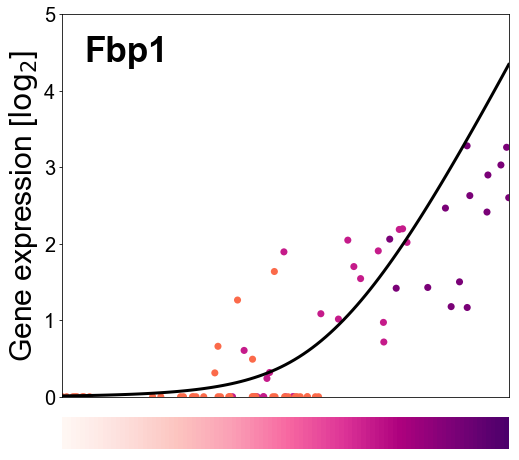

In [219]:
g = 'Fbp1'

dpt = dpt_ANA_IRS2
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS2.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.RdPu
ylim = (0, 5)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS2_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

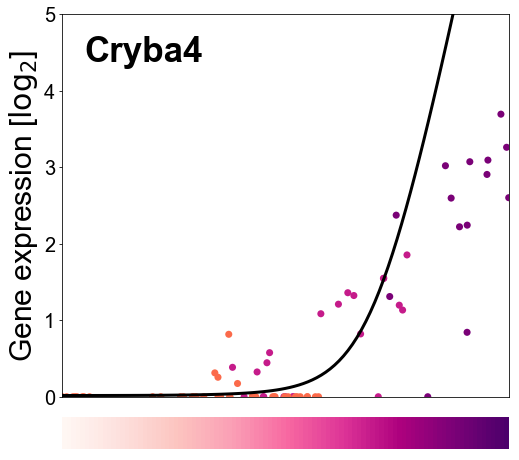

In [220]:
g = 'Cryba4'

dpt = dpt_ANA_IRS2
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS2.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.RdPu
ylim = (0, 5)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS2_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

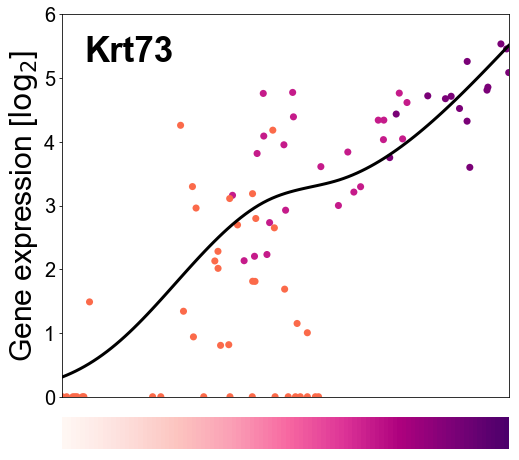

In [221]:
g = 'Krt73'

dpt = dpt_ANA_IRS2
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS2.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.RdPu
ylim = (0, 6)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS2_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Transcription factors

In [83]:
TF_sel_IRS2 = ['Sap18','Cited4','Sp6',]

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:82: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


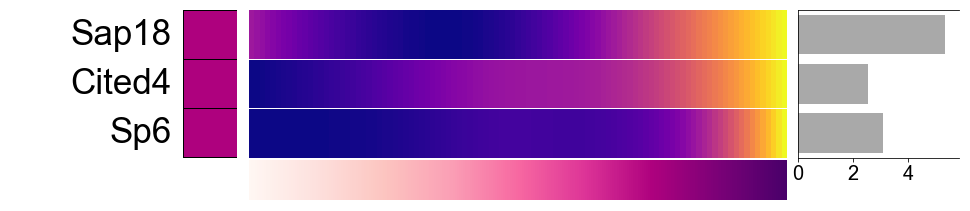

In [84]:
gene_sel = TF_sel_IRS2
splines = IRS2_fitted_norm
p_val = -np.log10(ANA_stats_IRS2['Pr(>Chisq)-BH_null'].astype(float))
cutoff = -np.log10(0.01)
gene_groups = cl_g_PT_IRS2
cmap_gene_groups = {3:'#fcc5c0',0:'#f768a1',1:'#ae017e',2:'#7a0177'}
cmap_splines = plt.cm.plasma
cmap_colorbar = plt.cm.RdPu

#initialize figure

height = 3.5
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[2.75,0.75], width_ratios=[3,1,10,3])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel) - 0.5, -0.5)

for pos, g in enumerate(gene_sel):
    ax.text(1.0, pos, g, family = 'Arial', fontsize = 35, ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(gene_sel), 0.0)

lw = 1

for pos, g in enumerate(gene_sel):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[gene_sel], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(gene_sel):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, 1)

for pos in np.arange(0, 1, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap_colorbar(pos))

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[gene_sel].max()*1.1)
ax.set_ylim(len(gene_sel) -0.9, -0.9)

ax.barh(bottom = [x - 0.4 for x in range(len(gene_sel))], 
        width = p_val.ix[gene_sel], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

#ax.axvline(cutoff, color = 'red', linewidth = 3)
ax.axvspan(ax.set_xlim()[0], ax.set_xlim()[1], color = 'white', zorder = 0)

#ax.set_xlabel('P-value [$-\log_{10}$]', 
              #family = 'Arial', fontsize = 25)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                tick.label.set_family('Arial')
            
ax.set_yticks([])

figname = 'v1.5_Fig5_diff_TF_IRS2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

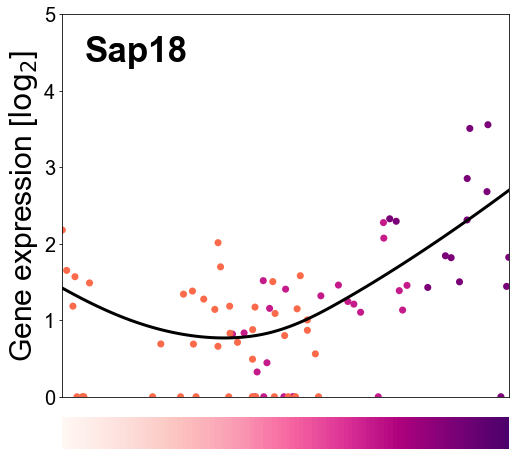

In [224]:
g = 'Sap18'

dpt = dpt_ANA_IRS2
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS2.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.RdPu
ylim = (0, 5)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS2_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

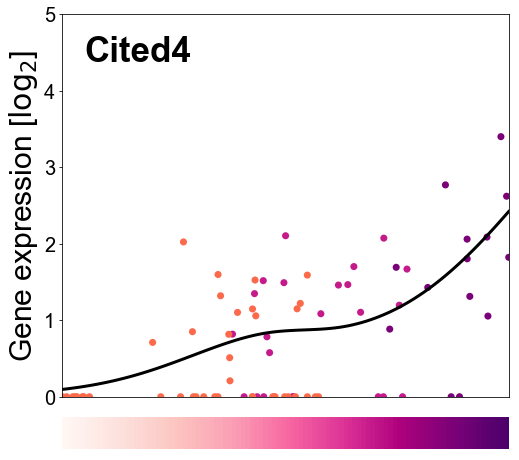

In [225]:
g = 'Cited4'

dpt = dpt_ANA_IRS2
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS2.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.RdPu
ylim = (0, 5)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS2_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

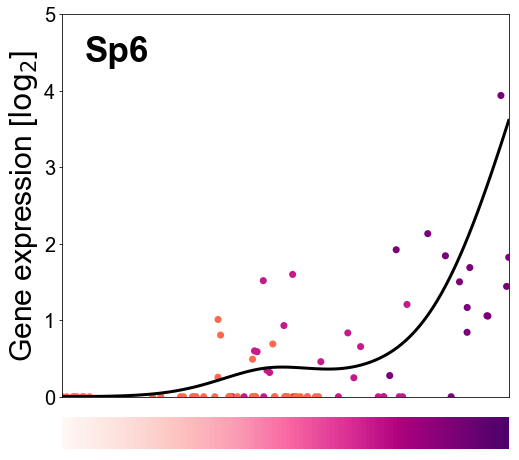

In [226]:
g = 'Sp6'

dpt = dpt_ANA_IRS2
data = seqN_log2.loc[g, dpt.index]
fit = np.log2(ANA_fitted_IRS2.loc[g].astype(float) + 1)
groups = cl_c_ANA_IRS
cmap = cmap_2nd
cmap_colorbar = plt.cm.RdPu
ylim = (0, 5)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5])

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(dpt.min(), dpt.max())
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

clist_tmp = [cmap[groups[ix]] for ix in data.index]

ax1.scatter(dpt,
            data,
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(fit,
         color = 'black',
         linewidth = 3)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0,1)

for i in np.arange(0,1,0.01):
    ax1b.axvspan(i, i + 0.01, color = cmap_colorbar(i))

clean_axis(ax1b)

figname = 'v1.5_Fig5_marker_fit_IRS2_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Plot comparative transcription factor profiles

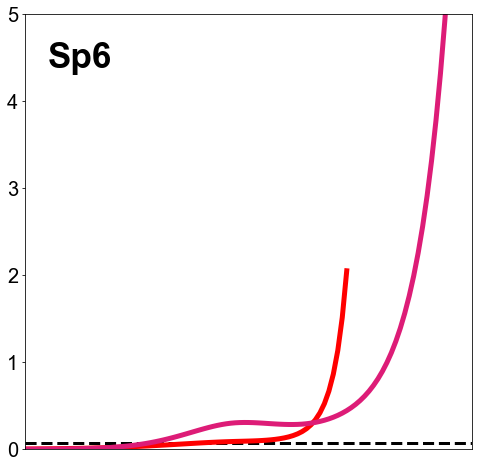

In [227]:
g = 'Sp6'
fit_null = ANA_IRS_fitted.loc['null'].loc[g]
fit_all = ANA_IRS_fitted.loc['all'].loc[g]
fit_IRS1 = ANA_fitted_IRS1.loc[g]
fit_IRS2 = ANA_fitted_IRS2.loc[g]

ylim = (0, 5)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot IRS1

ax1.plot(fit_IRS1.index,
         fit_IRS1.values,
         color = 'red',
         linewidth = 5)

#plot IRS2

ax1.plot(fit_IRS2.index,
         fit_IRS2.values,
         color = '#dd1c77',
         linewidth = 5)


ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

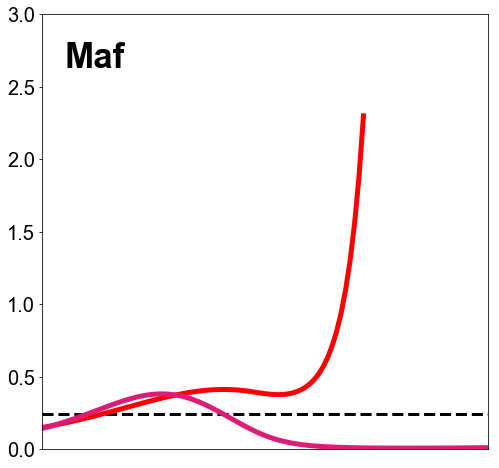

In [228]:
g = 'Maf'
fit_null = ANA_IRS_fitted.loc['null'].loc[g]
fit_all = ANA_IRS_fitted.loc['all'].loc[g]
fit_IRS1 = ANA_fitted_IRS1.loc[g]
fit_IRS2 = ANA_fitted_IRS2.loc[g]

ylim = (0, 3)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot IRS1

ax1.plot(fit_IRS1.index,
         fit_IRS1.values,
         color = 'red',
         linewidth = 5)

#plot IRS2

ax1.plot(fit_IRS2.index,
         fit_IRS2.values,
         color = '#dd1c77',
         linewidth = 5)


ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

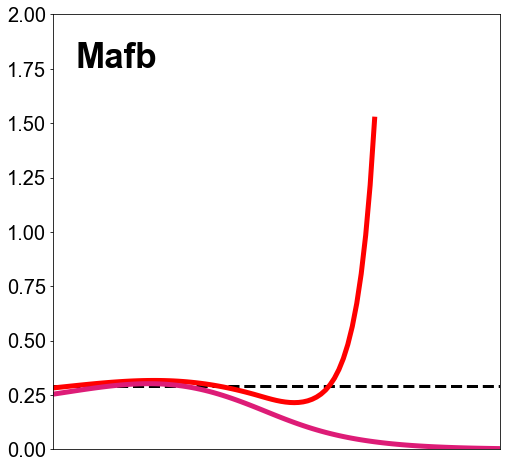

In [229]:
g = 'Mafb'
fit_null = ANA_IRS_fitted.loc['null'].loc[g]
fit_all = ANA_IRS_fitted.loc['all'].loc[g]
fit_IRS1 = ANA_fitted_IRS1.loc[g]
fit_IRS2 = ANA_fitted_IRS2.loc[g]

ylim = (0, 2)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot IRS1

ax1.plot(fit_IRS1.index,
         fit_IRS1.values,
         color = 'red',
         linewidth = 5)

#plot IRS2

ax1.plot(fit_IRS2.index,
         fit_IRS2.values,
         color = '#dd1c77',
         linewidth = 5)


ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

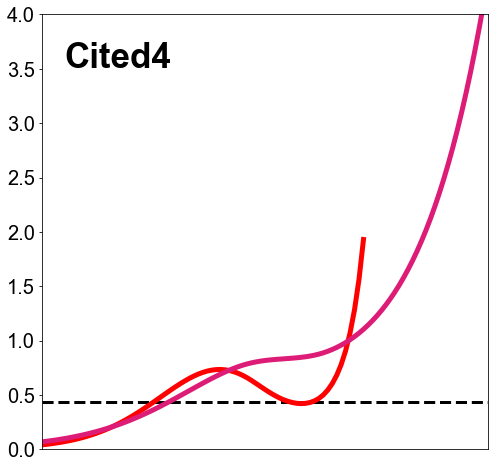

In [230]:
g = 'Cited4'
fit_null = ANA_IRS_fitted.loc['null'].loc[g]
fit_all = ANA_IRS_fitted.loc['all'].loc[g]
fit_IRS1 = ANA_fitted_IRS1.loc[g]
fit_IRS2 = ANA_fitted_IRS2.loc[g]

ylim = (0, 4)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot IRS1

ax1.plot(fit_IRS1.index,
         fit_IRS1.values,
         color = 'red',
         linewidth = 5)

#plot IRS2

ax1.plot(fit_IRS2.index,
         fit_IRS2.values,
         color = '#dd1c77',
         linewidth = 5)


ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

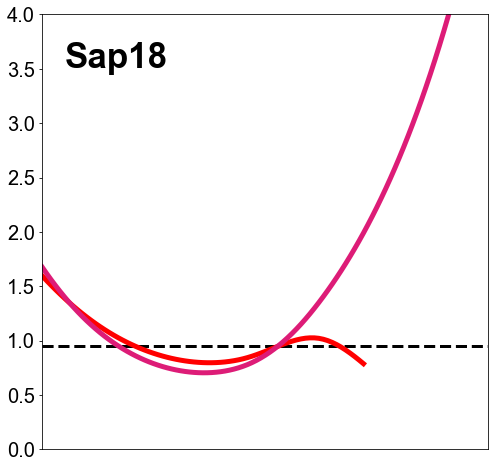

In [231]:
g = 'Sap18'
fit_null = ANA_IRS_fitted.loc['null'].loc[g]
fit_all = ANA_IRS_fitted.loc['all'].loc[g]
fit_IRS1 = ANA_fitted_IRS1.loc[g]
fit_IRS2 = ANA_fitted_IRS2.loc[g]

ylim = (0, 4)

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax1 = plt.subplot(111)

ax1.set_xlim(0, 1)
ax1.set_xticks([])

ax1.set_ylim(ylim)

for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(20)
#ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Arial', fontsize = 30)

#plot null model

ax1.plot(fit_null.index,
         fit_null.values,
         color = 'black',
         linewidth = 3, 
         linestyle = '--')

#plot reduced model

#ax1.plot(fit_all.index,
         #fit_all.values,
         #color = 'black',
         #linewidth = 2)

#plot IRS1

ax1.plot(fit_IRS1.index,
         fit_IRS1.values,
         color = 'red',
         linewidth = 5)

#plot IRS2

ax1.plot(fit_IRS2.index,
         fit_IRS2.values,
         color = '#dd1c77',
         linewidth = 5)


ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.9, g, fontsize = 35, family = 'Arial', va = 'center', weight = 'bold')
ax1.axvspan(0,1, color = 'w', zorder = 0)

figname = 'v1.5_Fig5_marker_comp_IRS_%s.pdf' % g
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Venn diagram of signatures

In [232]:
genes_do_CL = cl_g_PT_CL[cl_g_PT_CL.isin([4, 2, 7, 6])].index
genes_up_CL = cl_g_PT_CL[cl_g_PT_CL.isin([3, 0, 1, 5])].index

In [233]:
genes_do_CX = cl_g_PT_CX[cl_g_PT_CX.isin([5, 4, 0, 1,])].index
genes_up_CX = cl_g_PT_CX[cl_g_PT_CX.isin([6, 2, 7, 3])].index

In [234]:
genes_do_IRS = cl_g_PT_IRS[cl_g_PT_IRS.isin([1, 2, 6, 7])].index
genes_up_IRS = cl_g_PT_IRS[cl_g_PT_IRS.isin([0, 4, 5, 3])].index

### Downregulated genes

In [235]:
from matplotlib_venn import venn3, venn3_circles

"        \nfigname = 'v1.4_FigS5_venn_down.pdf'\nplt.savefig('%s/%s' % (path_figures, figname), \n            format = 'pdf', \n            transparent = True, \n            bbox_inches = 'tight', \n            pad_inches = 0, \n            rasterized = True)\n"

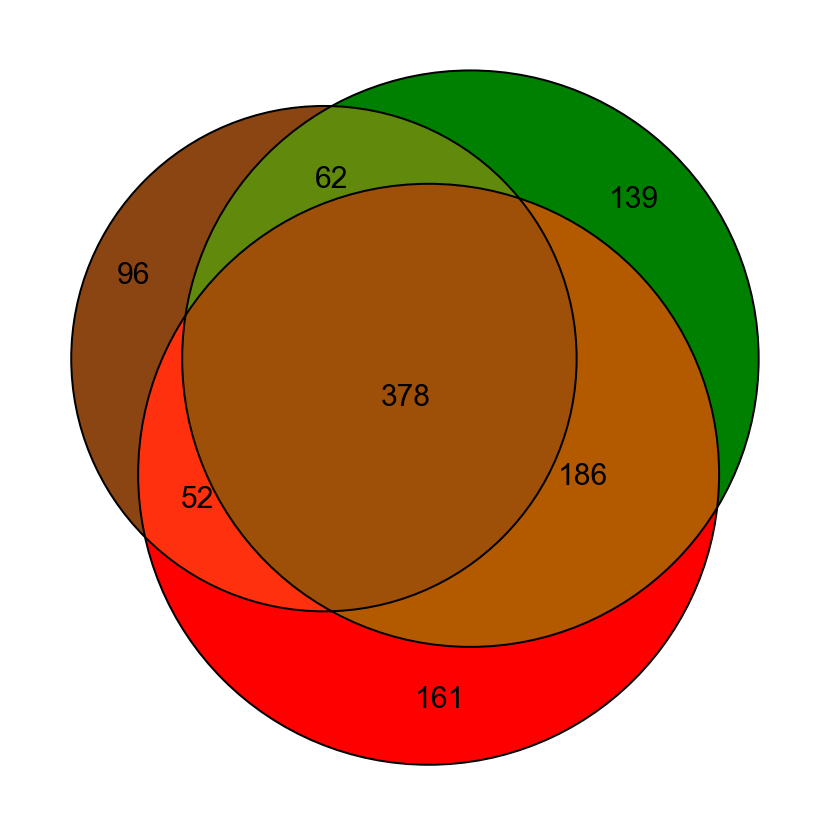

In [236]:
#initialize figure

height = 15
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn3(subsets = [set(genes_do_CL), set(genes_do_CX), set(genes_do_IRS)], 
          ax = ax, 
          set_colors=('saddlebrown','green','red'), 
          alpha = 1.0, set_labels = ('','',''))

venn3_circles(subsets = [set(genes_do_CL), set(genes_do_CX), set(genes_do_IRS)], 
              ax = ax)

for ix in ['000','100','010','001','110','101','011','111']:
    try:
        v.get_label_by_id(ix).set_family('Arial')
        v.get_label_by_id(ix).set_fontsize(30)
    except:
        continue
"""        
figname = 'v1.4_FigS5_venn_down.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)
"""

### Upregulated genes

"        \nfigname = 'v1.4_FigS5_venn_up.pdf'\nplt.savefig('%s/%s' % (path_figures, figname), \n            format = 'pdf', \n            transparent = True, \n            bbox_inches = 'tight', \n            pad_inches = 0, \n            rasterized = True)\n"

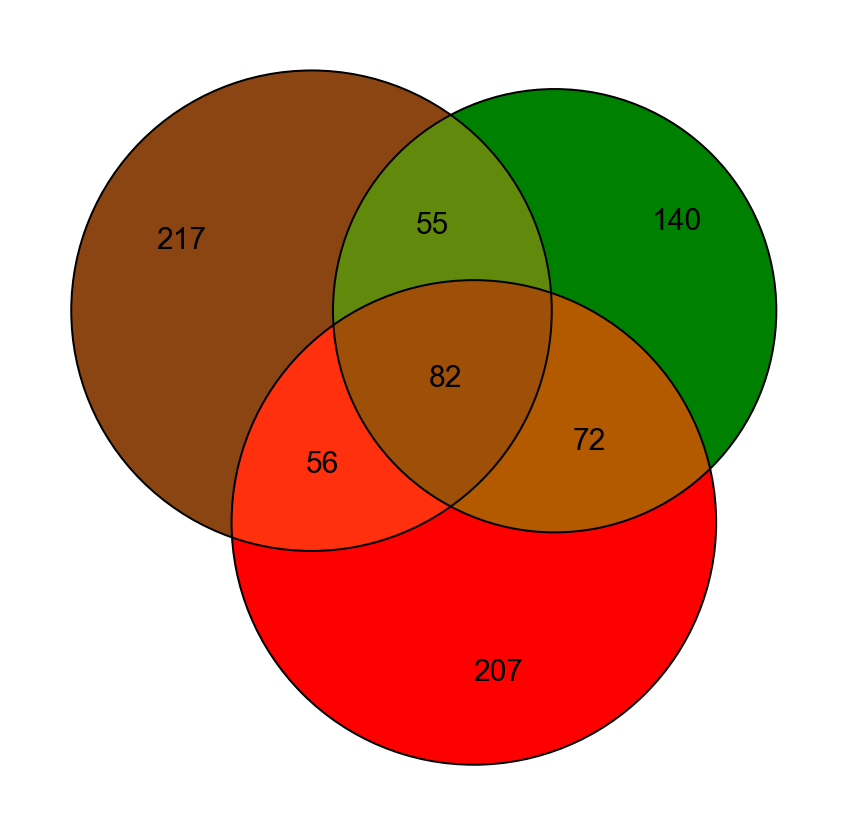

In [237]:
#initialize figure

height = 15
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn3(subsets = [set(genes_up_CL), set(genes_up_CX), set(genes_up_IRS)], 
          ax = ax, 
          set_colors=('saddlebrown','green','red'), 
          alpha = 1.0, set_labels = ('','',''))

venn3_circles(subsets = [set(genes_up_CL), set(genes_up_CX), set(genes_up_IRS)], 
              ax = ax)

for ix in ['000','100','010','001','110','101','011','111']:
    try:
        v.get_label_by_id(ix).set_family('Arial')
        v.get_label_by_id(ix).set_fontsize(30)
    except:
        continue
"""        
figname = 'v1.4_FigS5_venn_up.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)
"""

In [931]:
len(set(genes_do_CL) | set(genes_do_CX) | set(genes_do_IRS))

1074

In [773]:
len(set(genes_do_CL) & set(genes_do_CX) & set(genes_do_IRS))

378

In [775]:
jacc_do = 378/1074
print(jacc_do)

0.35195530726256985


In [776]:
len(set(genes_up_CL) | set(genes_up_CX) | set(genes_up_IRS))

829

In [777]:
len(set(genes_up_CL) & set(genes_up_CX) & set(genes_up_IRS))

82

In [778]:
jacc_do = 82/829
print(jacc_do)

0.09891435464414958


In [1007]:
genes_do_shared = set(genes_do_CL) & set(genes_do_CX) & set(genes_do_IRS)

In [781]:
genes_up_CL_un = set(genes_up_CL) - (set(genes_up_CX) | set(genes_up_IRS))
genes_up_CX_un = set(genes_up_CX) - (set(genes_up_CL) | set(genes_up_IRS))
genes_up_IRS_un = set(genes_up_IRS) - (set(genes_up_CX) | set(genes_up_CL))

In [1014]:
len(genes_up_IRS_un)

207

# Legends

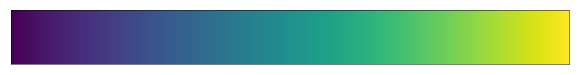

In [533]:
cmap = plt.cm.viridis
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(0.0, 1.0)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)

figname = 'v1.4_Legend_viridis.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

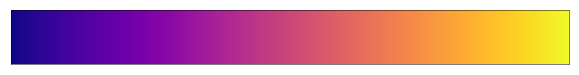

In [534]:
cmap = plt.cm.plasma
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(0.0, 1.0)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)

figname = 'v1.4_Legend_plasma.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

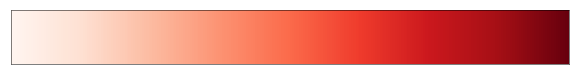

In [535]:
cmap = plt.cm.Reds
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(0.0, 1.0)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)

figname = 'v1.4_Legend_Reds.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

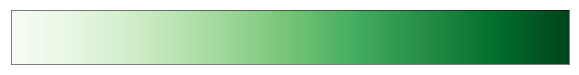

In [536]:
cmap = plt.cm.Greens
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(0.0, 1.0)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)

figname = 'v1.4_Legend_Greens.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

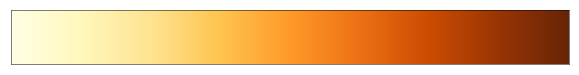

In [537]:
cmap = plt.cm.YlOrBr
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(0.0, 1.0)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)

figname = 'v1.4_Legend_YlOrBr.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

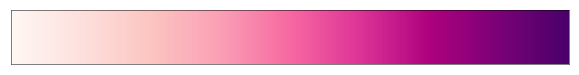

In [998]:
cmap = plt.cm.RdPu
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(0.0, 1.0)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)

figname = 'v1.4_Legend_RdPu.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

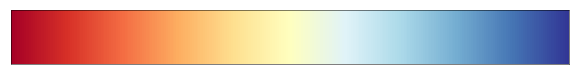

In [70]:
cmap = plt.cm.RdYlBu
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(0.0, 1.0)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)

figname = 'v1.5_Legend_RdYlBu.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)